In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_rows=999
pd.options.display.max_columns=40

In [3]:
data1=pd.read_csv('application_data.csv')
data2=pd.read_csv('previous_application.csv')

In [4]:
data1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,1206000.0,NaN,Working,Higher education,Single / not married,House / apartment,0.035792,-10667,-285,-2521,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-20211,-4651,-11281,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.025164,-10280,-1158,-8620,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
49997,157874,0,Cash loans,F,N,Y,0,270000.0,820638.0,34897.5,733500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.022625,-23485,-2181,-2662,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0


In [5]:
print(data1.shape)

(49999, 122)


<AxesSubplot: >

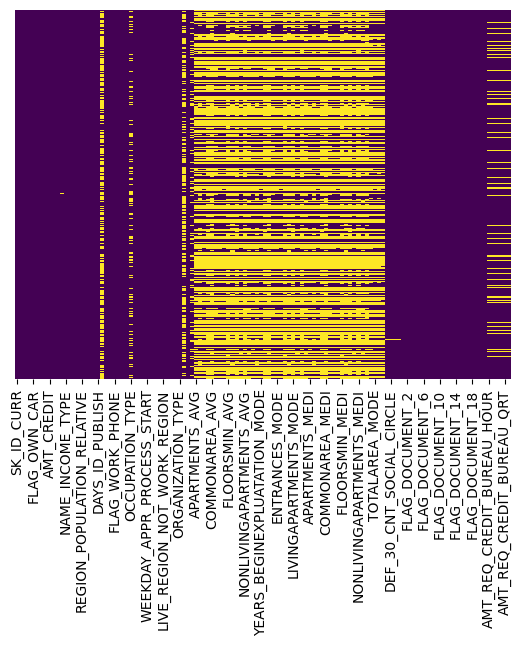

In [6]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
data1.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS

In [8]:
def nullval(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [9]:
nullval(data1)

COMMONAREA_MEDI                 69.92
COMMONAREA_AVG                  69.92
COMMONAREA_MODE                 69.92
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
LIVINGAPARTMENTS_MODE           68.45
LIVINGAPARTMENTS_AVG            68.45
LIVINGAPARTMENTS_MEDI           68.45
FONDKAPREMONT_MODE              68.38
FLOORSMIN_AVG                   67.79
FLOORSMIN_MODE                  67.79
FLOORSMIN_MEDI                  67.79
YEARS_BUILD_MEDI                66.48
YEARS_BUILD_MODE                66.48
YEARS_BUILD_AVG                 66.48
OWN_CAR_AGE                     65.90
LANDAREA_MEDI                   59.44
LANDAREA_MODE                   59.44
LANDAREA_AVG                    59.44
BASEMENTAREA_MEDI               58.40
BASEMENTAREA_AVG                58.40
BASEMENTAREA_MODE               58.40
EXT_SOURCE_1                    56.35
NONLIVINGAREA_MODE              55.15
NONLIVINGAREA_AVG               55.15
NONLIVINGARE

In [10]:
null_col_40 = nullval(data1)[nullval(data1)>40]
print("following columns have null value more than 40%")
print(null_col_40.index)
print("No. of columns with more than 40% missing value:",len(null_col_40.index))

following columns have null value more than 40%
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOO

In [11]:
data1.drop(columns = null_col_40.index, inplace = True)

In [12]:
data1.shape

(49999, 73)

In [13]:
nullval(data1)[nullval(data1)>0]

OCCUPATION_TYPE               31.31
EXT_SOURCE_3                  19.89
AMT_REQ_CREDIT_BUREAU_YEAR    13.47
AMT_REQ_CREDIT_BUREAU_QRT     13.47
AMT_REQ_CREDIT_BUREAU_MON     13.47
AMT_REQ_CREDIT_BUREAU_WEEK    13.47
AMT_REQ_CREDIT_BUREAU_DAY     13.47
AMT_REQ_CREDIT_BUREAU_HOUR    13.47
NAME_TYPE_SUITE                0.38
OBS_30_CNT_SOCIAL_CIRCLE       0.34
DEF_30_CNT_SOCIAL_CIRCLE       0.34
OBS_60_CNT_SOCIAL_CIRCLE       0.34
DEF_60_CNT_SOCIAL_CIRCLE       0.34
EXT_SOURCE_2                   0.25
AMT_GOODS_PRICE                0.08
dtype: float64

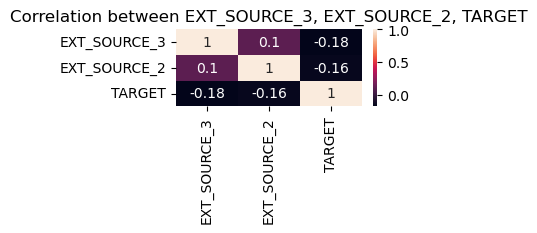

In [14]:
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]
#making a heatmap 
plt.figure(figsize= [3,1])
sns.heatmap(data1[irrev+["TARGET"]].corr(),annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET")
plt.show()

In [15]:
data1.drop(irrev,axis=1,inplace=True)

In [16]:
data1.shape

(49999, 71)

In [17]:
flag=[col for col in data1 if 'FLAG' in col]

In [18]:
flag

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [19]:
len(flag)

28

In [20]:
flagdata=data1[flag+["TARGET"]]

In [21]:
flagdata

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,N,N,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49995,N,N,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49996,N,N,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
flagdata["TARGET"] = flagdata["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/1567356293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagdata["TARGET"] = flagdata["TARGET"].replace({1:"Defaulter", 0:"Repayer"})


In [23]:
for i in flagdata:
    if i!= "TARGET":
        flagdata[i] = flagdata[i].replace({1:"Y", 0:"N"})

/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/66448603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagdata[i] = flagdata[i].replace({1:"Y", 0:"N"})


In [24]:
flagdata

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,N,N,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
49995,N,N,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
49996,N,N,Y,Y,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
49997,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer


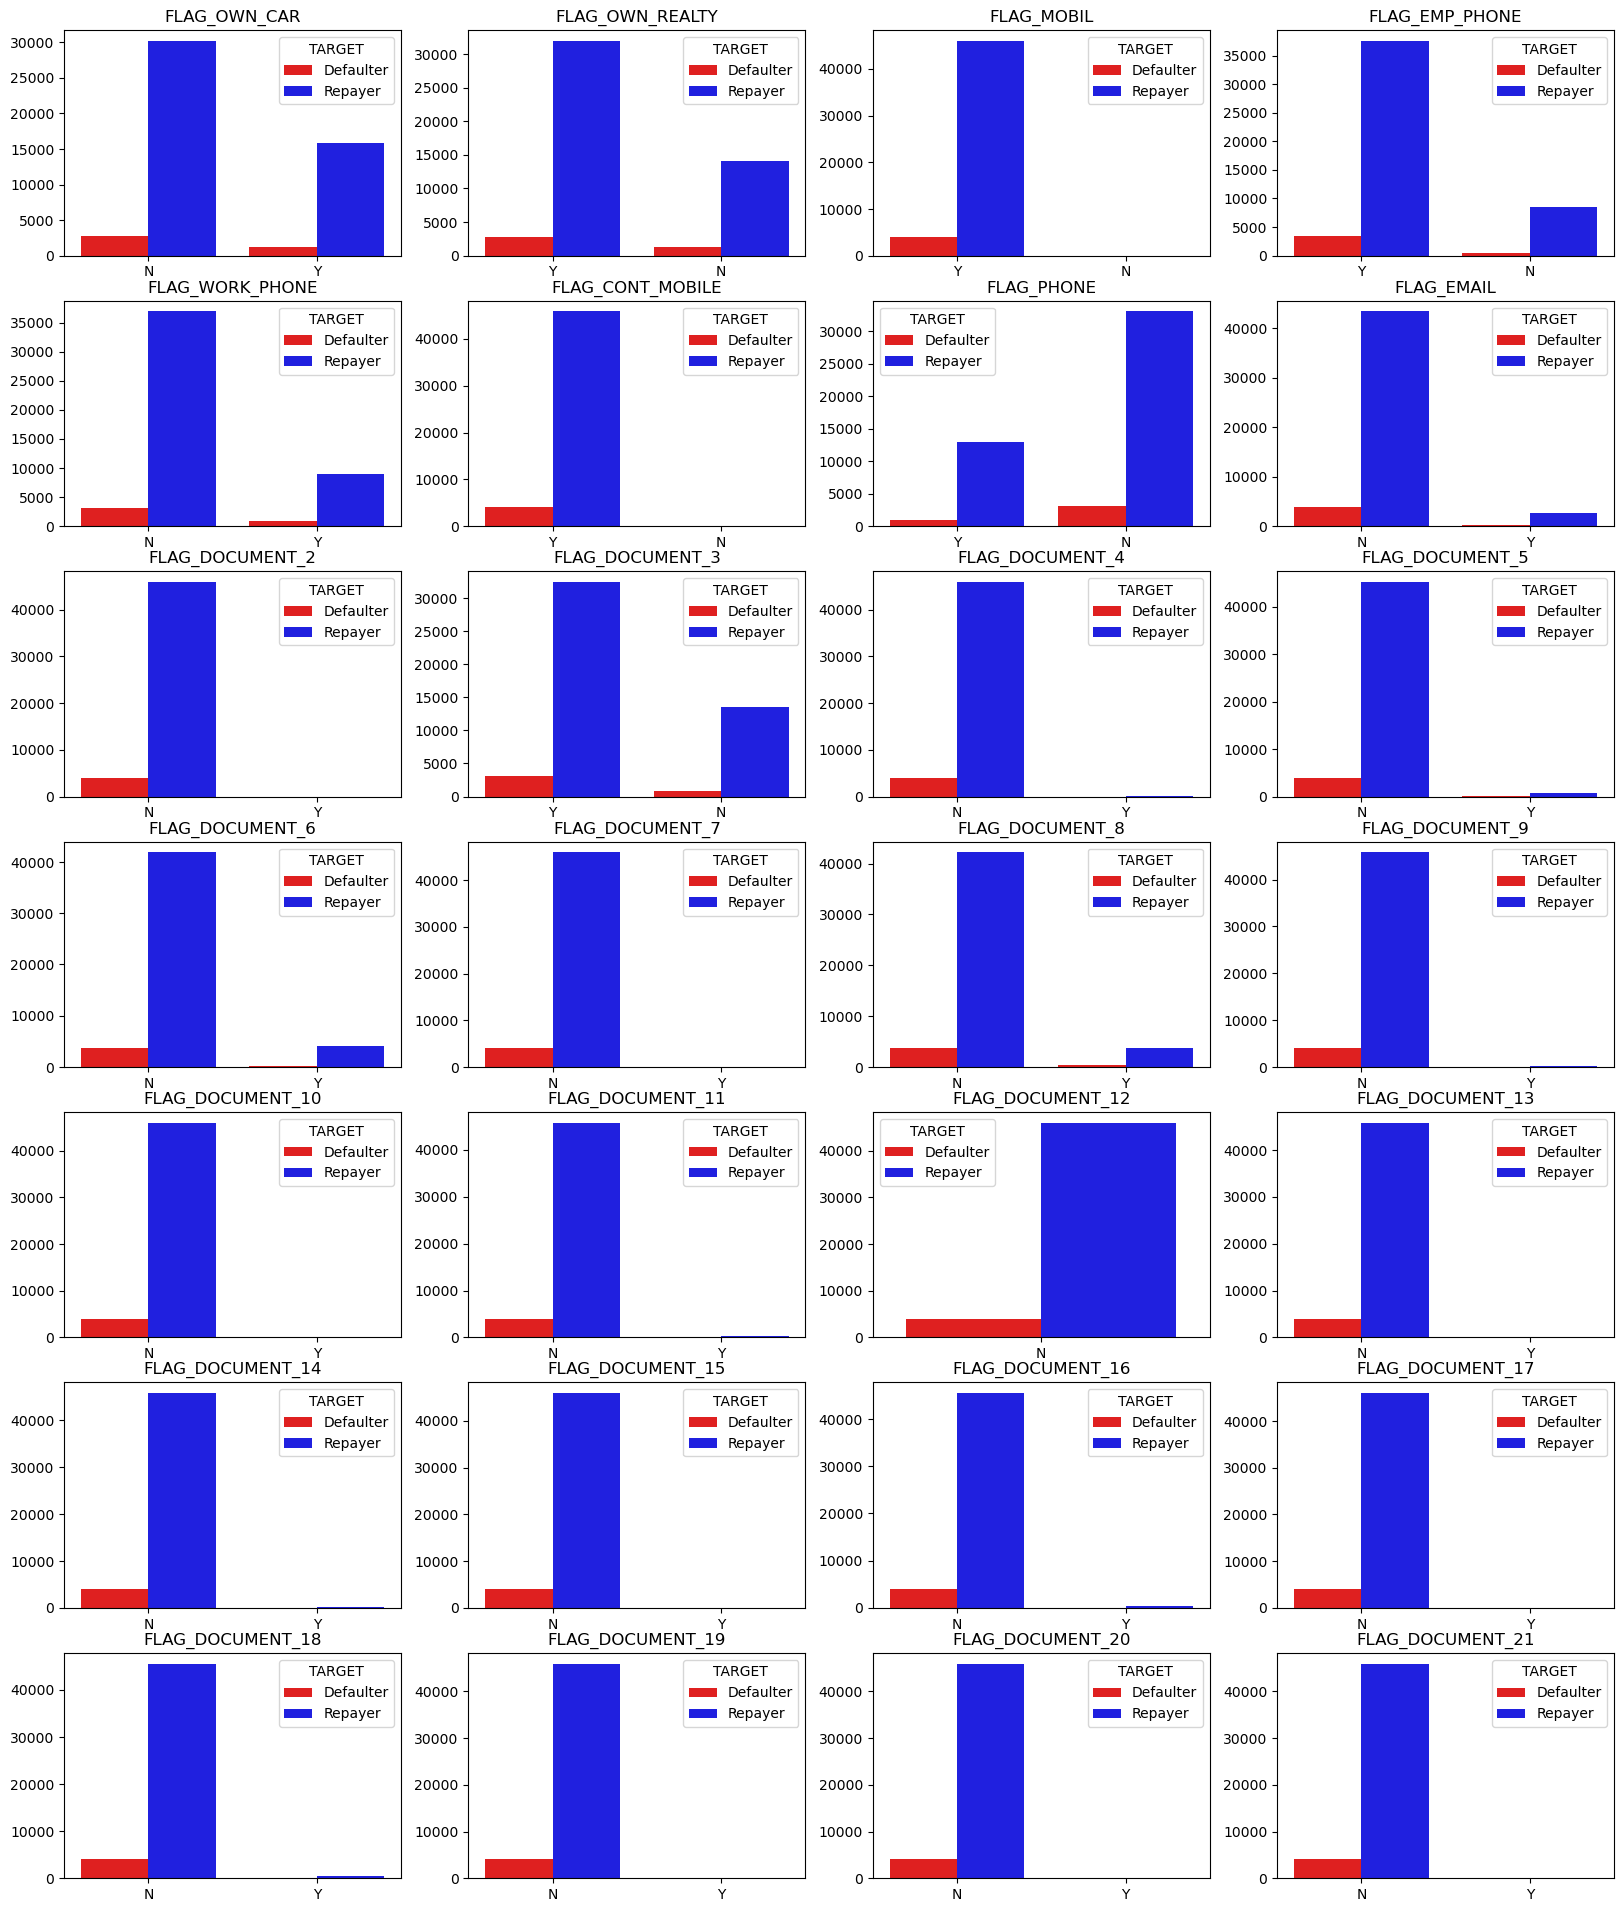

In [25]:
import itertools 
plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=flagdata[i], hue = flagdata["TARGET"], palette = ["r","b"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [26]:
flagdata.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3","FLAG_OWN_CAR"], axis=1 , inplace = True)

/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/2740542199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagdata.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3","FLAG_OWN_CAR"], axis=1 , inplace = True)


In [27]:
data1.drop(flagdata.columns, axis=1, inplace= True)

In [28]:
data1.shape

(49999, 47)

In [29]:
nullval(data1)[nullval(data1)>0]

OCCUPATION_TYPE               31.31
AMT_REQ_CREDIT_BUREAU_YEAR    13.47
AMT_REQ_CREDIT_BUREAU_QRT     13.47
AMT_REQ_CREDIT_BUREAU_MON     13.47
AMT_REQ_CREDIT_BUREAU_WEEK    13.47
AMT_REQ_CREDIT_BUREAU_DAY     13.47
AMT_REQ_CREDIT_BUREAU_HOUR    13.47
NAME_TYPE_SUITE                0.38
DEF_60_CNT_SOCIAL_CIRCLE       0.34
OBS_60_CNT_SOCIAL_CIRCLE       0.34
DEF_30_CNT_SOCIAL_CIRCLE       0.34
OBS_30_CNT_SOCIAL_CIRCLE       0.34
AMT_GOODS_PRICE                0.08
dtype: float64

In [30]:
data1["OCCUPATION_TYPE"].value_counts()

Laborers                 8952
Sales staff              5160
Core staff               4434
Managers                 3489
Drivers                  3044
High skill tech staff    1852
Accountants              1621
Medicine staff           1403
Security staff           1140
Cooking staff             963
Cleaning staff            739
Private service staff     447
Low-skill Laborers        357
Waiters/barmen staff      228
Secretaries               212
Realty agents             123
HR staff                  101
IT staff                   80
Name: OCCUPATION_TYPE, dtype: int64

In [31]:
data1["OCCUPATION_TYPE"]=data1["OCCUPATION_TYPE"].fillna("Unknown")

<AxesSubplot: >

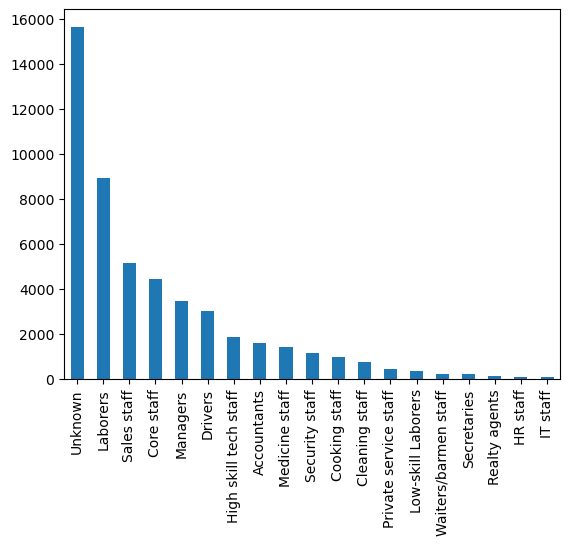

In [32]:
(data1["OCCUPATION_TYPE"].value_counts()).plot.bar()

In [33]:
AMT=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [34]:
data1[AMT].median()

AMT_REQ_CREDIT_BUREAU_YEAR    1.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
dtype: float64

In [35]:
data1.fillna(data1[AMT].median(), inplace=True)

In [36]:
nullval(data1)[nullval(data1)>0]

NAME_TYPE_SUITE             0.38
DEF_60_CNT_SOCIAL_CIRCLE    0.34
OBS_30_CNT_SOCIAL_CIRCLE    0.34
DEF_30_CNT_SOCIAL_CIRCLE    0.34
OBS_60_CNT_SOCIAL_CIRCLE    0.34
AMT_GOODS_PRICE             0.08
dtype: float64

In [37]:
data1["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      40435
Family              6549
Spouse, partner     1849
Children             542
Other_B              259
Other_A              137
Group of people       36
Name: NAME_TYPE_SUITE, dtype: int64

In [38]:
data1["NAME_TYPE_SUITE"]=data1["NAME_TYPE_SUITE"].fillna("Unaccompanied") 

In [39]:
data1["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      40627
Family              6549
Spouse, partner     1849
Children             542
Other_B              259
Other_A              137
Group of people       36
Name: NAME_TYPE_SUITE, dtype: int64

In [40]:
nullval(data1)[nullval(data1)>0]

OBS_60_CNT_SOCIAL_CIRCLE    0.34
OBS_30_CNT_SOCIAL_CIRCLE    0.34
DEF_30_CNT_SOCIAL_CIRCLE    0.34
DEF_60_CNT_SOCIAL_CIRCLE    0.34
AMT_GOODS_PRICE             0.08
dtype: float64

In [41]:
remain=["DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]

In [42]:
data1.fillna(data1[remain].median(),inplace=True)

In [43]:
nullval(data1)[nullval(data1)>0]

AMT_GOODS_PRICE    0.08
dtype: float64

In [44]:
data1.fillna(data1["AMT_GOODS_PRICE"].median(),inplace=True)

<AxesSubplot: >

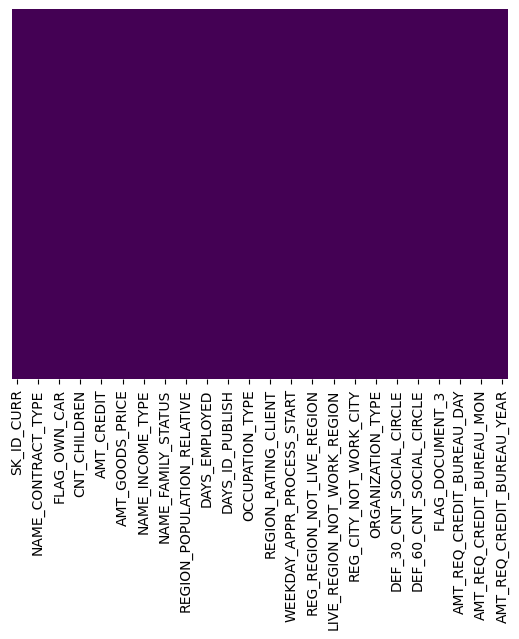

In [45]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,...,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,...,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,...,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,...,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,...,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data1['AMT_INCOME_TOTAL']=data1['AMT_INCOME_TOTAL']/100000

In [48]:
data1['AMT_INCOME_TOTAL'].max()

1170.0

In [49]:
bins = [0,1,2,3,4,5,6,7,8,9,10,1170]#1170 is the largest value
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data1['AMT_INCOME_RANGE']=pd.cut(data1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [50]:
data1['AMT_GOODS_PRICE']=data1['AMT_GOODS_PRICE']/100000
data1['AMT_GOODS_PRICE'].max()

40.5

In [51]:
bins = [0,1,2,3,4,5,6,7,8,9,10,41] #40.5 is the highest value
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

data1['AMT_GOODS_PRICE_RANGE']=pd.cut(data1['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [52]:
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

In [53]:
data1[days_col]=abs(data1[days_col])

In [54]:
data1["AGE"] = abs(data1["DAYS_BIRTH"]/365)

In [55]:
data1["AGE"].max()

68.9972602739726

In [56]:
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]
data1["AGE_GROUP"] = pd.cut(data1["AGE"], bins=bins, labels=slots)

In [57]:
data1["AGE_GROUP"].value_counts(normalize=True)*100

35-40       13.780276
40-45       13.526271
30-35       13.064261
60 Above    11.532231
50-55       11.488230
45-50       11.452229
25-30       10.596212
55-60       10.552211
20-25        4.008080
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [58]:
data1["YEARS_EMPLOYED"] = data1["DAYS_EMPLOYED"]/365
data1["YEARS_EMPLOYED"].max()

1000.6657534246575

In [59]:
bins = [0,5,10,15,20,25,30,1001] #1000.5 was largest value
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

data1["EMPLOYEMENT_YEARS"] = pd.cut(data1["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [60]:
data1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,129013.210584,0.080522,0.419848,1.707676,5.997006e+05,27115.835377,5.389923,0.020798,16022.042081,67160.324386,4977.282666,2996.797176,0.999980,11.159083,2.051661,2.030721,12.052561,0.015000,0.049921,0.039641,0.079962,0.232165,0.179704,1.416008,0.141343,1.398948,0.098002,973.277066,0.712254,0.006140,0.00650,0.028021,0.233885,0.225825,1.762375,43.896006,184.000889
std,16690.512048,0.272102,0.724039,5.318191,4.024154e+05,14685.092571,3.697208,0.013761,4361.400270,138957.897110,3525.548305,1509.235410,0.004472,2012.471856,0.507978,0.502221,3.252584,0.121555,0.217784,0.195116,0.271236,0.422218,0.383944,2.299685,0.439875,2.279393,0.356708,2172.734332,0.452717,0.081625,0.10049,0.180876,0.868682,0.571627,1.760795,11.949042,380.706567
min,100002.000000,0.000000,0.000000,0.256500,4.500000e+04,2052.000000,0.450000,0.000533,7680.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,21.041096,0.000000
25%,114570.500000,0.000000,0.000000,1.125000,2.700000e+05,16456.500000,2.385000,0.010006,12378.500000,933.000000,1998.000000,1722.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,33.913699,2.556164
50%,129076.000000,0.000000,0.000000,1.458000,5.147775e+05,24939.000000,4.500000,0.018850,15731.000000,2216.000000,4490.000000,3261.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,755.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,43.098630,6.071233
75%,143438.500000,0.000000,1.000000,2.025000,8.086500e+05,34596.000000,6.795000,0.028663,19644.000000,5718.000000,7463.500000,4297.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1573.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,53.819178,15.665753
max,157875.000000,1.000000,11.000000,1170.000000,4.050000e+06,450000.000000,40.500000,0.072508,25184.000000,365243.000000,22392.000000,6232.000000,1.000000,450000.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,6.000000,28.000000,5.000000,450000.000000,1.000000,3.000000,6.00000,6.000000,24.000000,8.000000,25.000000,68.997260,1000.665753


In [61]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "CNT_FAM_MEMBERS"]

/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: U

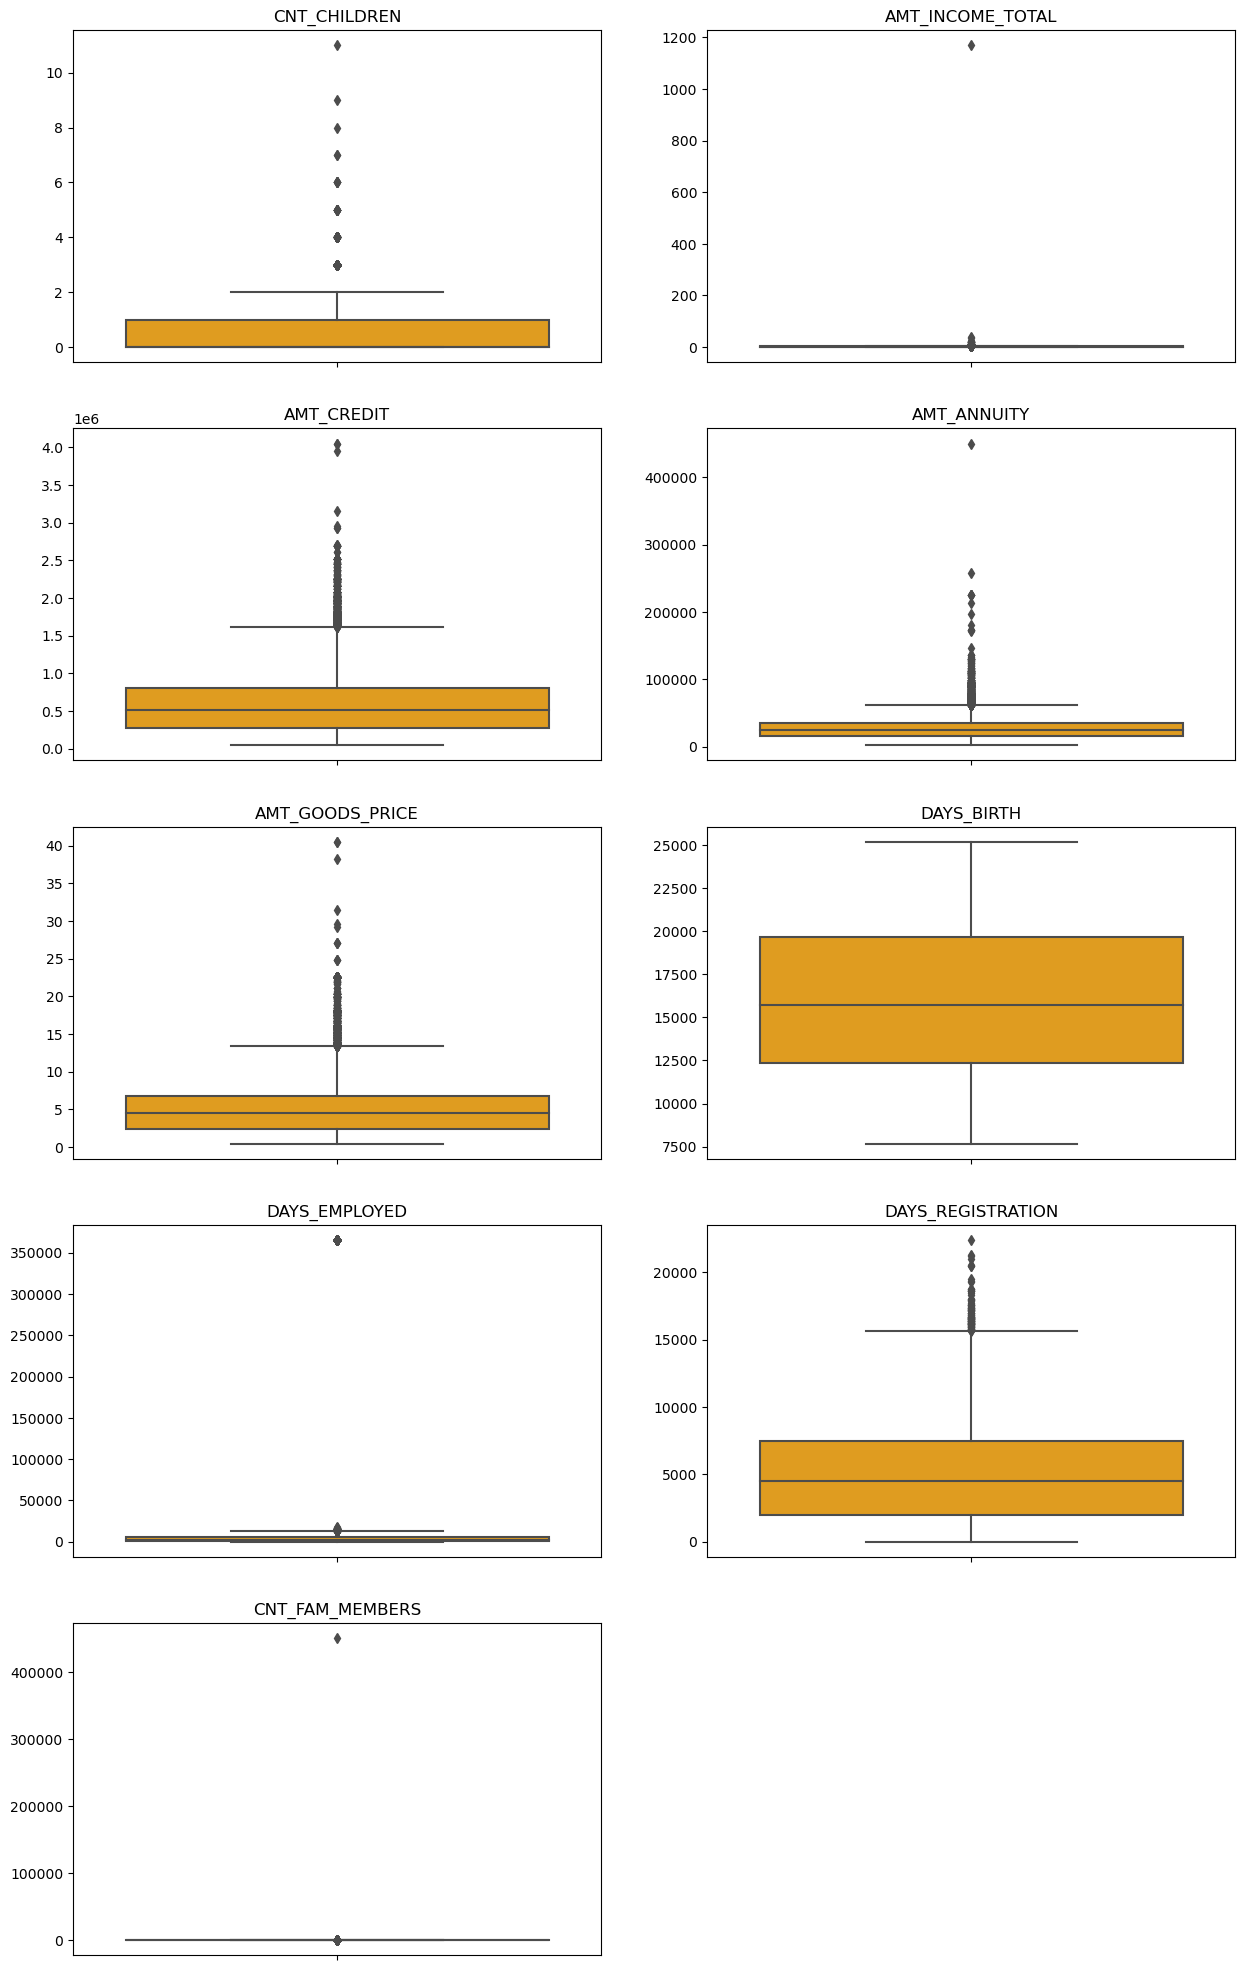

In [62]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(5,2,j+1)
    sns.boxplot(y = data1[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [63]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

In [64]:
for col in categorical_columns:
    data1[col] = pd.Categorical(data1[col])

In [65]:
data2.shape

(49999, 37)

<AxesSubplot: >

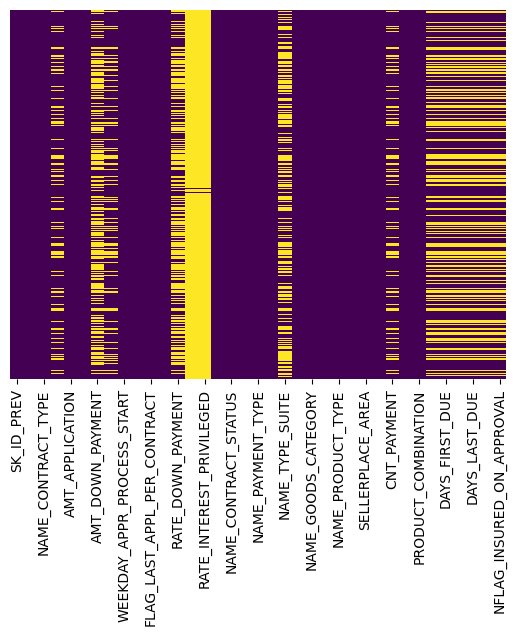

In [66]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
nullval(data2)

RATE_INTEREST_PRIVILEGED       99.67
RATE_INTEREST_PRIMARY          99.67
RATE_DOWN_PAYMENT              50.40
AMT_DOWN_PAYMENT               50.40
NAME_TYPE_SUITE                48.49
NFLAG_INSURED_ON_APPROVAL      38.32
DAYS_FIRST_DRAWING             38.32
DAYS_FIRST_DUE                 38.32
DAYS_LAST_DUE_1ST_VERSION      38.32
DAYS_LAST_DUE                  38.32
DAYS_TERMINATION               38.32
AMT_GOODS_PRICE                21.49
AMT_ANNUITY                    21.18
CNT_PAYMENT                    21.18
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [68]:
nullval(data2)[nullval(data2)>0]

RATE_INTEREST_PRIVILEGED     99.67
RATE_INTEREST_PRIMARY        99.67
RATE_DOWN_PAYMENT            50.40
AMT_DOWN_PAYMENT             50.40
NAME_TYPE_SUITE              48.49
NFLAG_INSURED_ON_APPROVAL    38.32
DAYS_FIRST_DRAWING           38.32
DAYS_FIRST_DUE               38.32
DAYS_LAST_DUE_1ST_VERSION    38.32
DAYS_LAST_DUE                38.32
DAYS_TERMINATION             38.32
AMT_GOODS_PRICE              21.49
AMT_ANNUITY                  21.18
CNT_PAYMENT                  21.18
PRODUCT_COMBINATION           0.02
dtype: float64

In [69]:
pnullcol50=nullval(data2)[nullval(data2)>50]

In [70]:
data2.drop(columns=pnullcol50.index,inplace=True)

In [71]:
data2.shape

(49999, 33)

In [72]:
data2["NAME_TYPE_SUITE"] = data2["NAME_TYPE_SUITE"].fillna("Unknown")

In [73]:
data2['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    20898
1.0     9941
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [74]:
data2["NFLAG_INSURED_ON_APPROVAL"] = data2["NFLAG_INSURED_ON_APPROVAL"].fillna(0)

In [75]:
data2['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    40058
1.0     9941
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

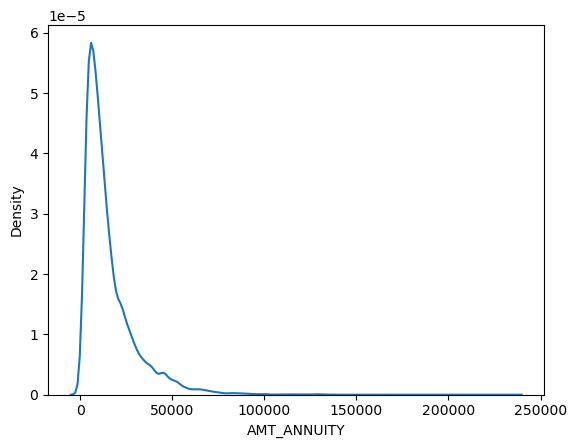

In [76]:
sns.kdeplot(data2['AMT_ANNUITY'])
plt.show()

In [77]:
data2['AMT_ANNUITY'].fillna(data2['AMT_ANNUITY'].median(),inplace = True)

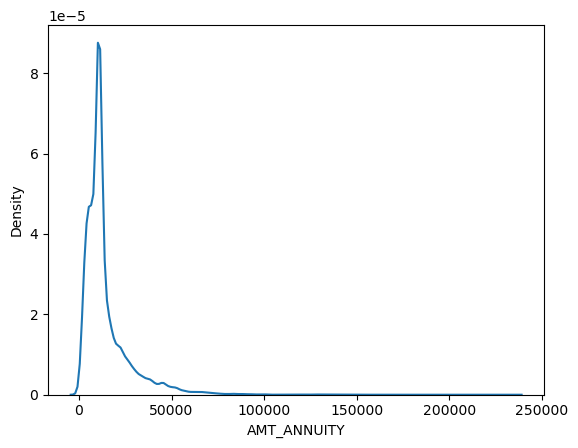

In [78]:
sns.kdeplot(data2['AMT_ANNUITY'])
plt.show()

In [79]:
data2['AMT_GOODS_PRICE'].fillna(data2['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [80]:
data2['PRODUCT_COMBINATION']=data2['PRODUCT_COMBINATION'].fillna("Unkown")

In [81]:
data2['CNT_PAYMENT'].fillna(0,inplace = True)

In [82]:
nullval(data2)[nullval(data2)>0]

DAYS_TERMINATION             38.32
DAYS_LAST_DUE                38.32
DAYS_LAST_DUE_1ST_VERSION    38.32
DAYS_FIRST_DUE               38.32
DAYS_FIRST_DRAWING           38.32
dtype: float64

In [83]:
data2.isnull().sum()[data2.isnull().sum()>0]

DAYS_FIRST_DRAWING           19160
DAYS_FIRST_DUE               19160
DAYS_LAST_DUE_1ST_VERSION    19160
DAYS_LAST_DUE                19160
DAYS_TERMINATION             19160
dtype: int64

In [84]:
p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

In [85]:
data2[p_days_col] = abs(data2[p_days_col])

In [86]:
#days group calculation 

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
data2['YEARLY_DECISION'] = pd.cut(data2['DAYS_DECISION'],bins,labels=slots)

In [87]:
for i in p_days_col:
    data2[i].fillna(data2[i].mode()[0],inplace=True)

In [88]:
nullval(data2)[nullval(data2)>0]

Series([], dtype: float64)

In [89]:
data2.shape

(49999, 34)

<AxesSubplot: >

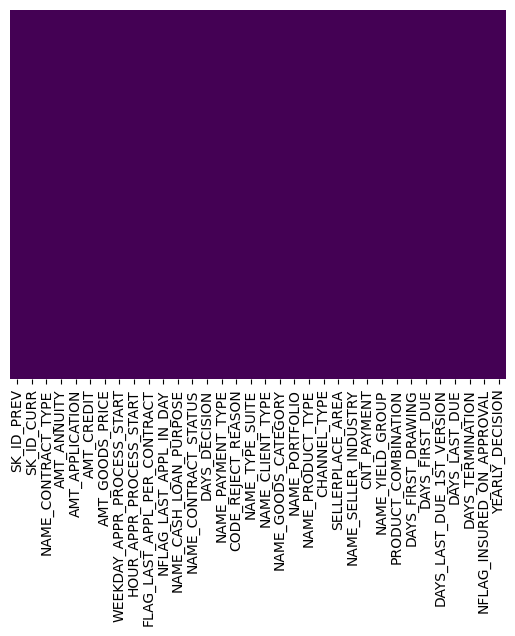

In [135]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [90]:
data2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

<AxesSubplot: >

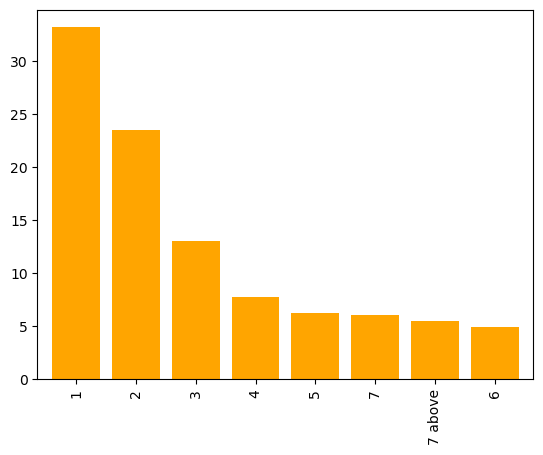

In [91]:
(data2['YEARLY_DECISION'].value_counts(normalize=True)*100).plot.bar(color= "orange",width = .8)

In [92]:
data2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,4.999900e+04,49999.000000,49999.000000,4.999900e+04,4.999900e+04,4.999900e+04,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,1.922254e+06,278983.187604,14507.546283,1.688925e+05,1.885429e+05,1.785807e+05,12.478330,0.996500,900.112622,4.016558e+02,12.260465,352507.985900,150041.747855,160284.283146,188263.065801,191278.538611,0.198824
std,5.351980e+05,102780.124434,13036.667868,2.822035e+05,3.084736e+05,2.769949e+05,3.333012,0.059058,786.531303,1.793772e+04,13.948296,66909.471728,179030.468166,180762.522260,182049.508993,181947.127326,0.399119
min,1.000001e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,-1.000000e+00,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.457920e+06,189919.500000,7189.740000,2.204550e+04,2.605500e+04,4.500000e+04,10.000000,1.000000,292.000000,-1.000000e+00,0.000000,365243.000000,723.000000,493.000000,838.000000,842.000000,0.000000
50%,1.920889e+06,279264.000000,10879.920000,7.155000e+04,7.890750e+04,7.155000e+04,12.000000,1.000000,599.000000,1.000000e+01,10.000000,365243.000000,2184.000000,2070.000000,365243.000000,365243.000000,0.000000
75%,2.388632e+06,368527.500000,16256.160000,1.800000e+05,1.981058e+05,1.800000e+05,15.000000,1.000000,1335.000000,1.000000e+02,14.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,0.000000
max,2.845367e+06,456254.000000,234478.395000,3.826372e+06,4.104351e+06,3.826372e+06,23.000000,1.000000,2922.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [93]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/bussarijashwanthjee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1592: U

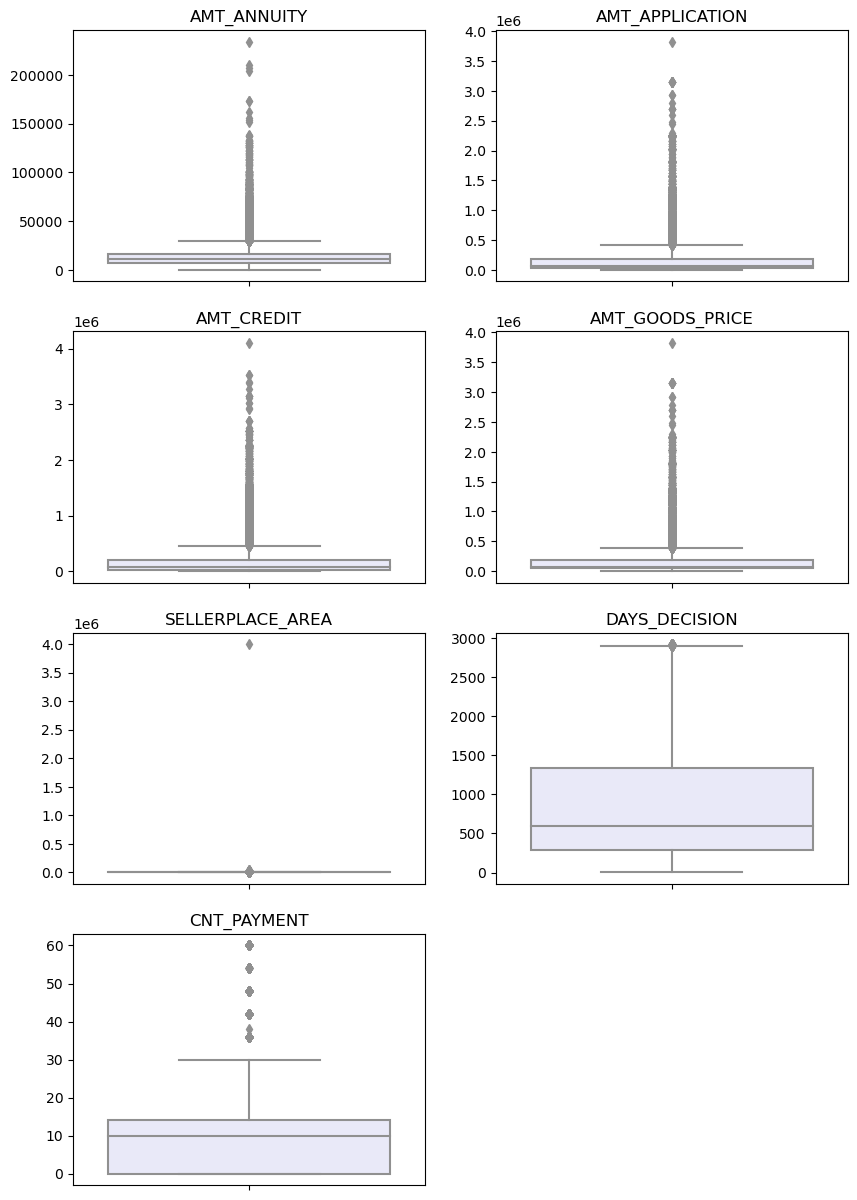

In [94]:
plt.figure(figsize=[10,15])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = data2[i], orient = "h", color = "lavender")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [95]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS
0,100002,1,Cash loans,M,N,Y,0,2.025,406597.5,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,...,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,3L-4L,25.920548,25-30,1.745205,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,1293502.5,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,...,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,45.931507,45-50,3.254795,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,135000.0,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,...,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,52.180822,50-55,0.616438,0-5
3,100006,0,Cash loans,F,N,Y,0,1.350,312682.5,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,...,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1L-2L,2L-3L,52.068493,50-55,8.326027,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215,513000.0,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,...,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,54.608219,50-55,8.323288,5-10


DATA IMBALANACE

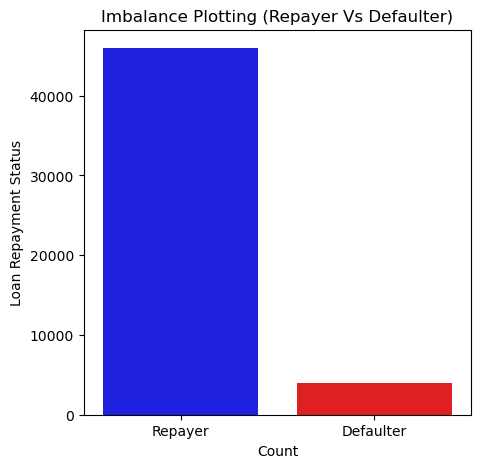

In [96]:
#data imbalance
plt.figure(figsize= [5,5])
sns.barplot(x=["Repayer","Defaulter"], y = data1["TARGET"].value_counts(), palette = ["blue","r"])
plt.ylabel("Loan Repayment Status")
plt.xlabel("Count")
plt.title("Imbalance Plotting (Repayer Vs Defaulter)")
plt.show()

In [97]:
a=data1['TARGET'].value_counts()
print( "No. of reapyers are ",a[0])
print("No. of defaulters are ",a[1])


No. of reapyers are  45973
No. of defaulters are  4026


In [98]:
repayer = round((data1["TARGET"].value_counts()[0]/len(data1)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((data1["TARGET"].value_counts()[1]/len(data1)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.95%
Defaulter Percentage is 8.05%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.42/1 (approx)


In [99]:
#function to find the dtype
def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"

In [100]:
#univariate analysis

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [101]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(x+" & "+y+" BIVARAITE ANALYSIS" ,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [102]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [103]:
cat_col = list(data1.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(data1.select_dtypes(["int","float"]).columns)  #N Numerical Column list

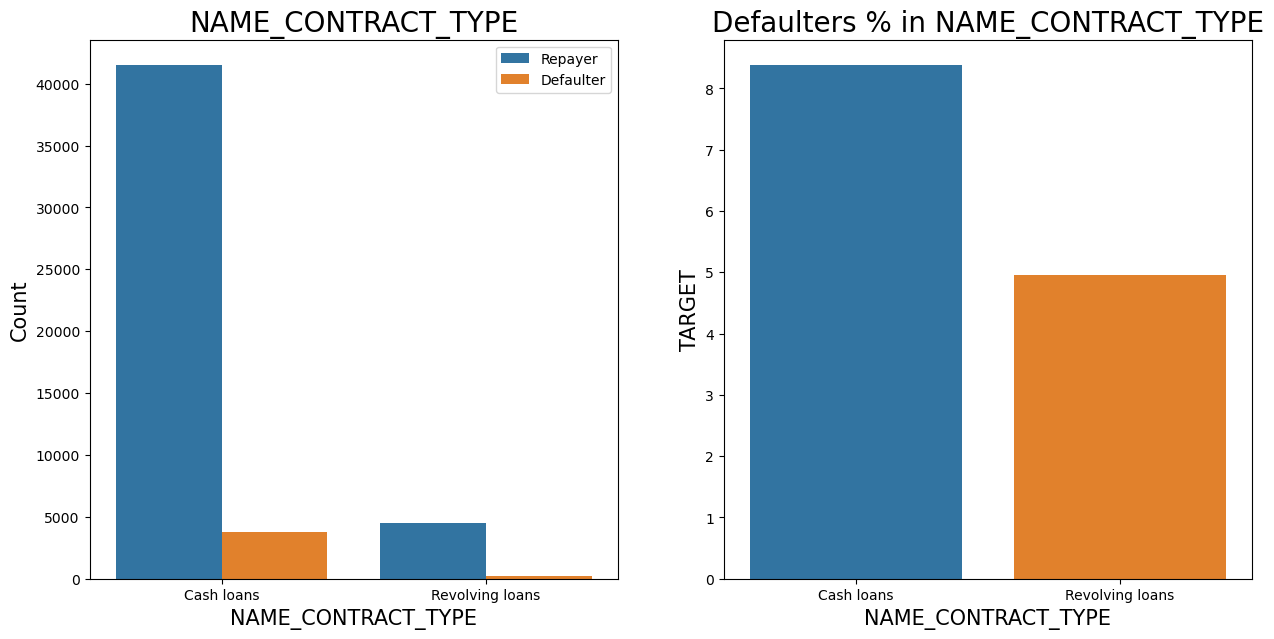

In [104]:
univariate(data1,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

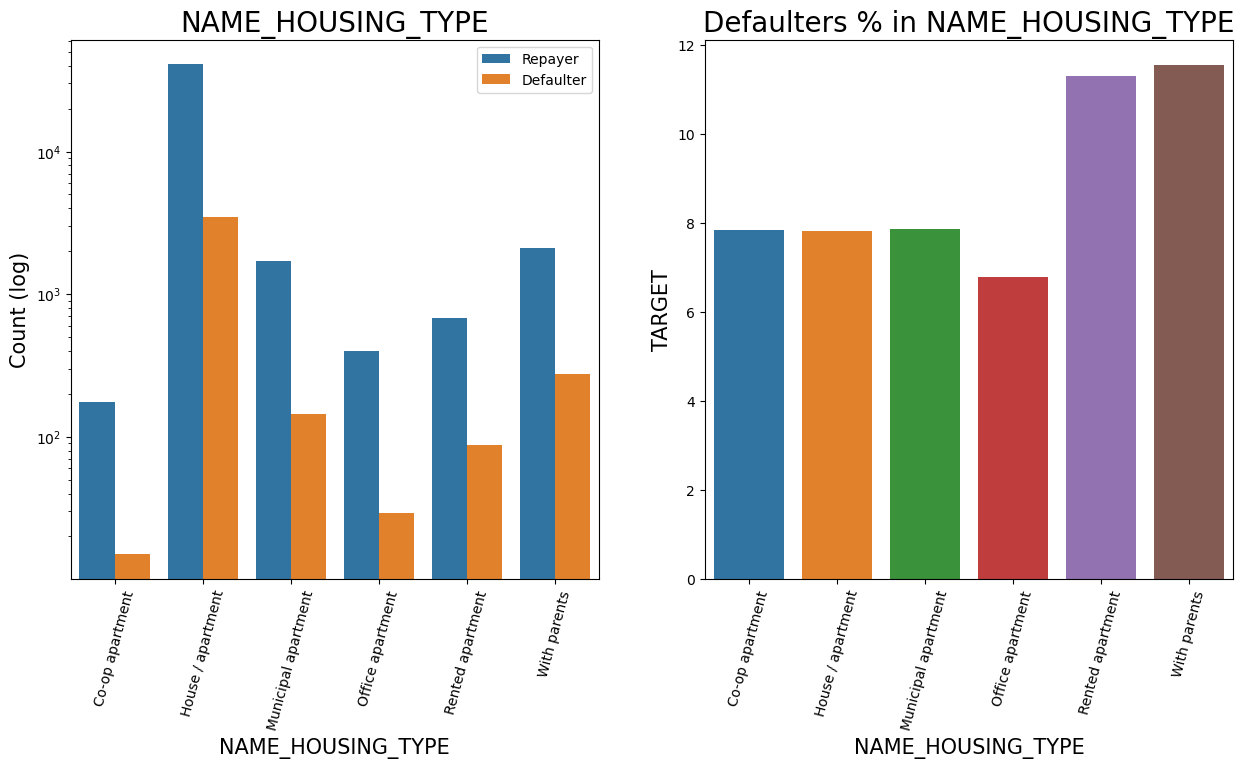

In [105]:
univariate(data1,"NAME_HOUSING_TYPE","TARGET",True,True)

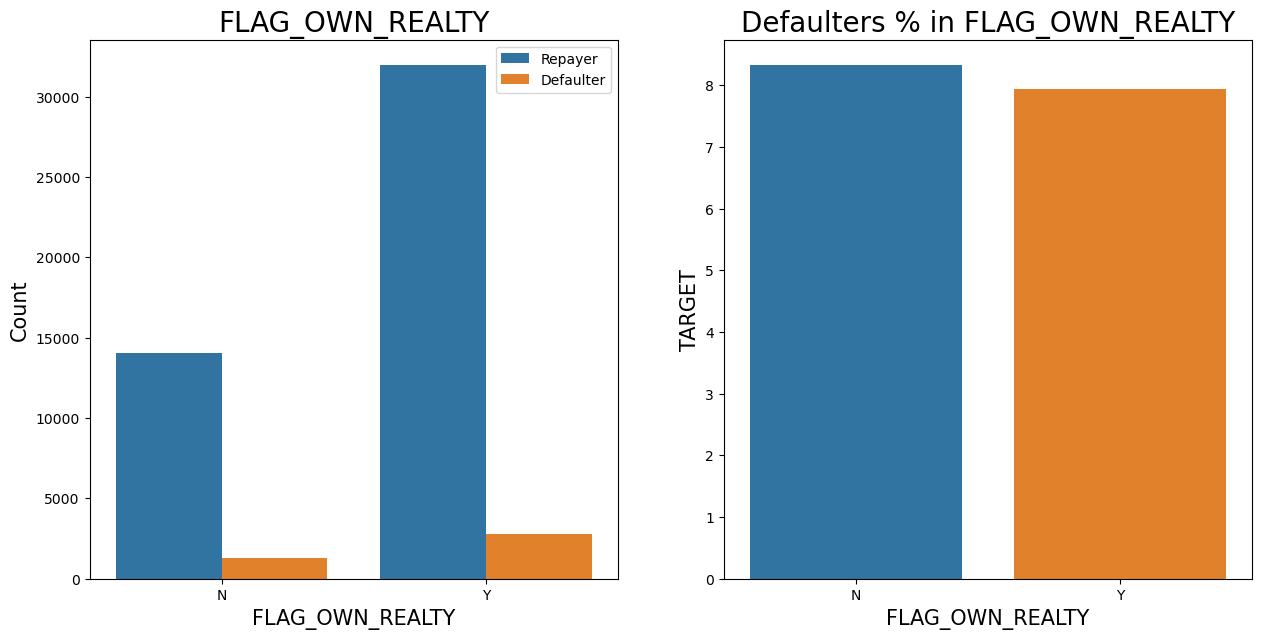

In [106]:
univariate(data1,"FLAG_OWN_REALTY","TARGET",False,False)

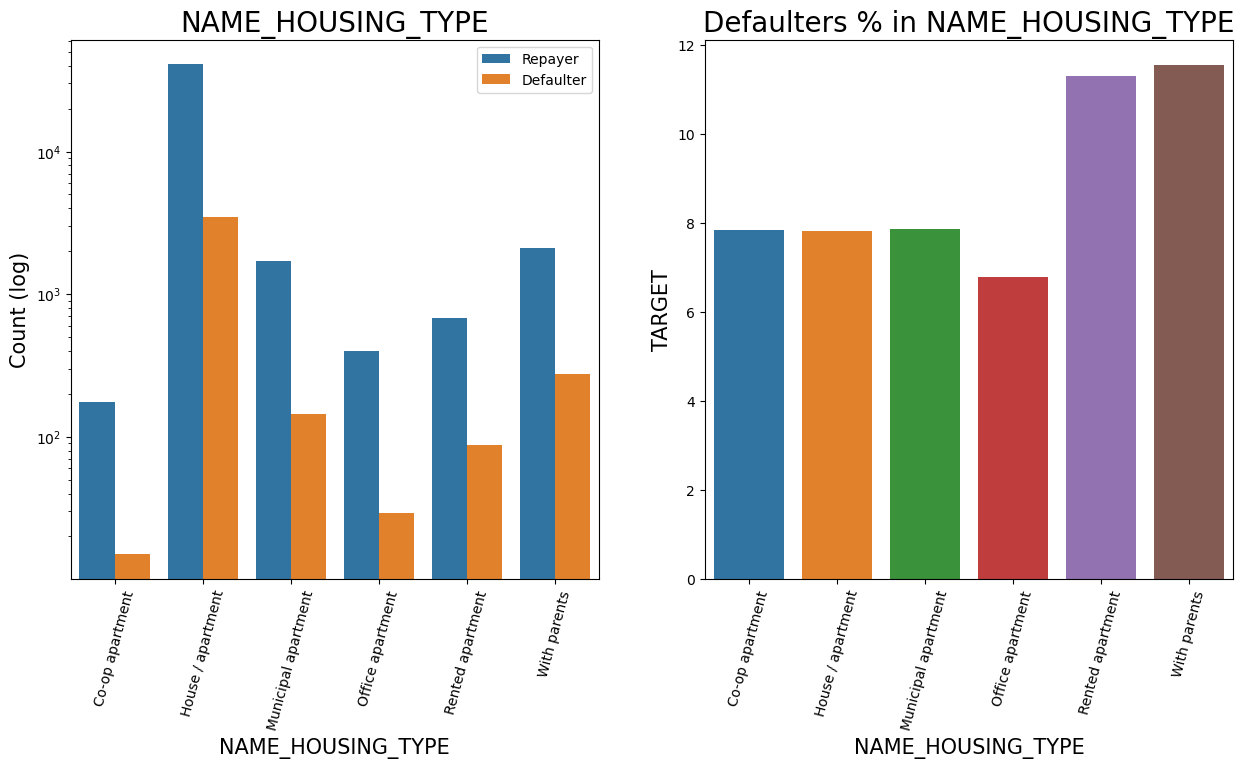

In [107]:
univariate(data1,"NAME_HOUSING_TYPE","TARGET",True,True)

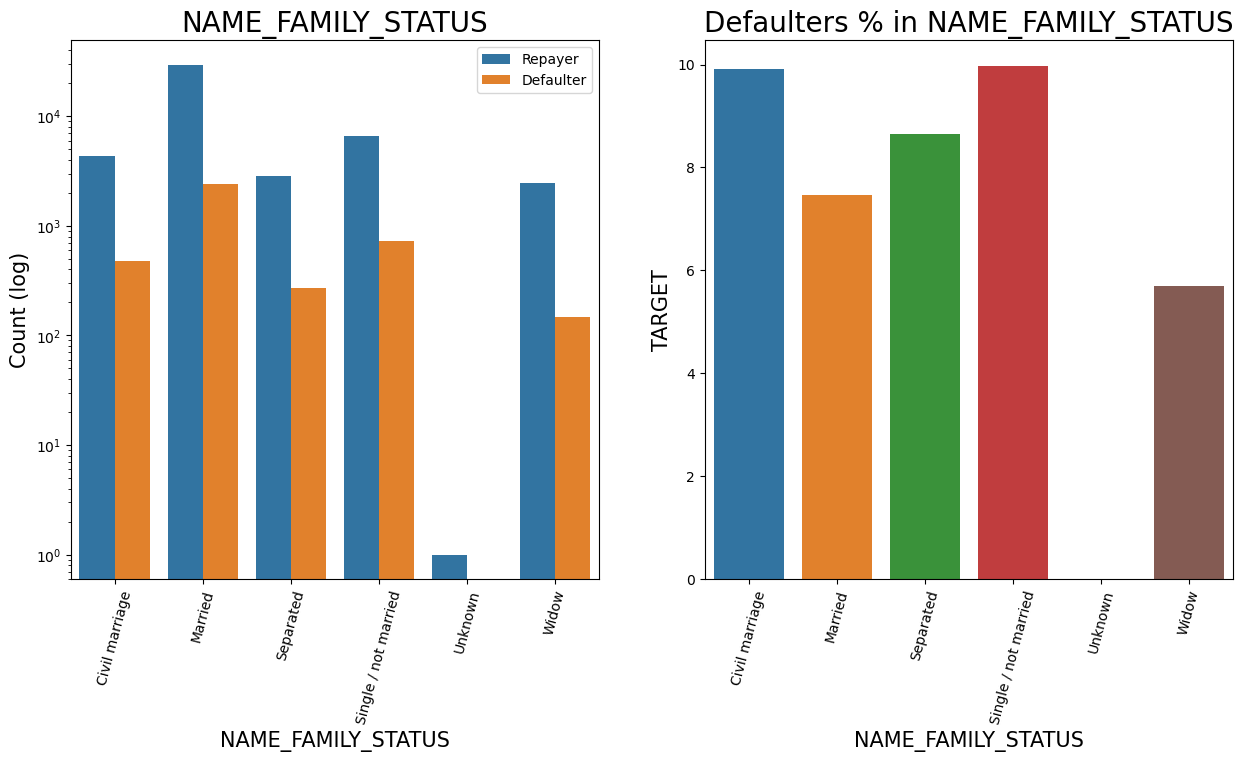

In [108]:
univariate(data1,"NAME_FAMILY_STATUS","TARGET",True,True)

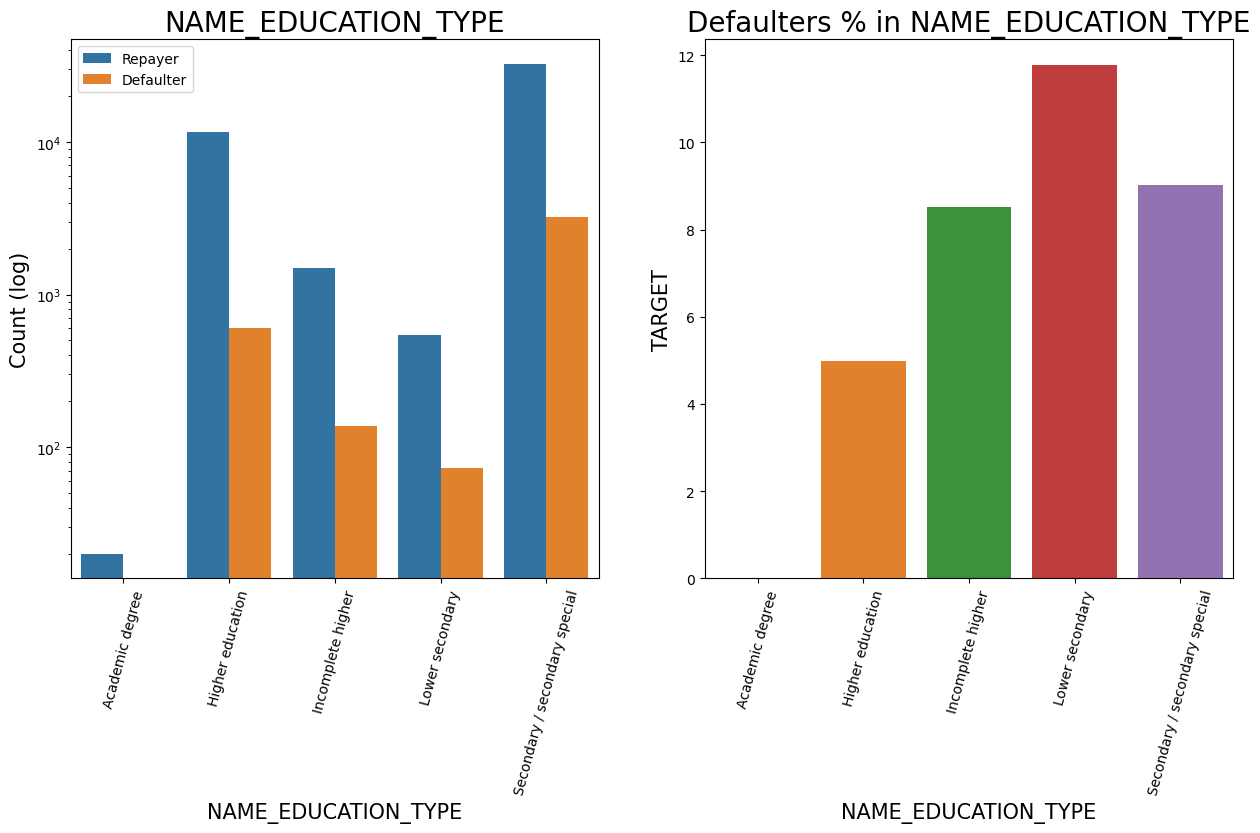

In [109]:
univariate(data1,"NAME_EDUCATION_TYPE","TARGET",True,True)

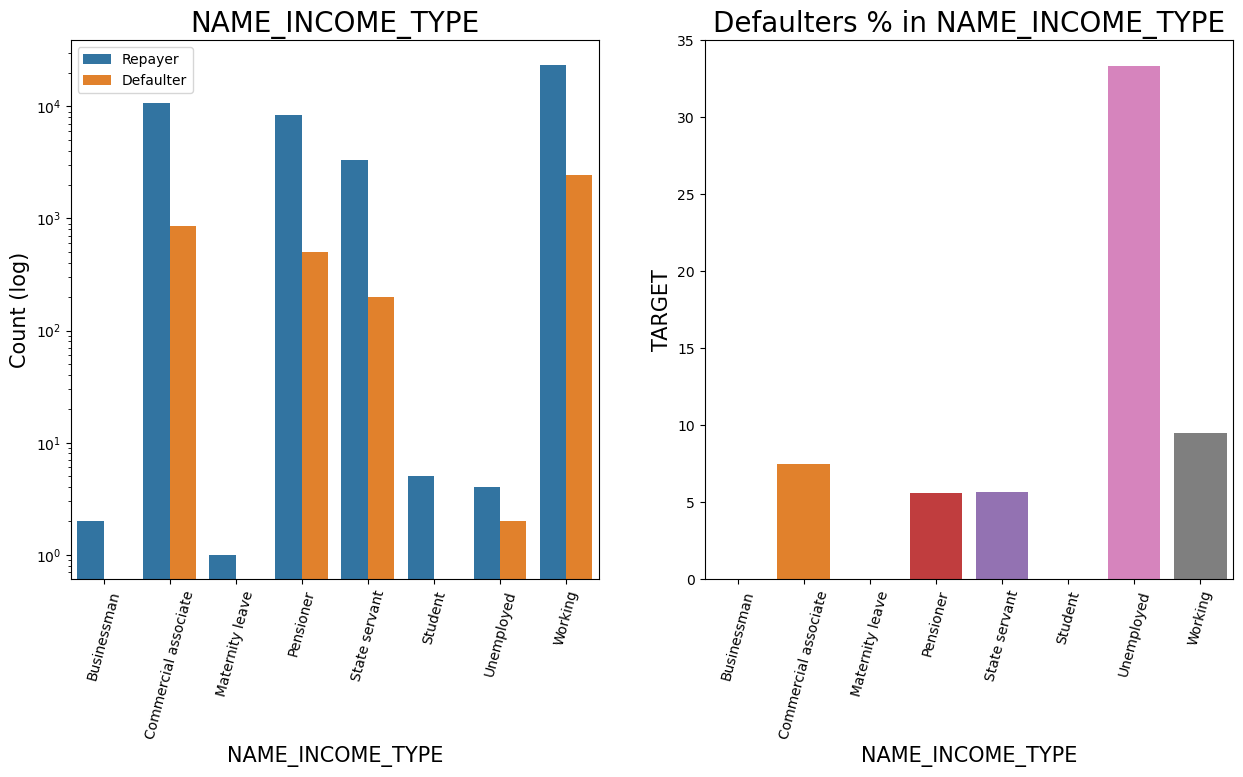

In [110]:
univariate(data1,"NAME_INCOME_TYPE","TARGET",True,True)

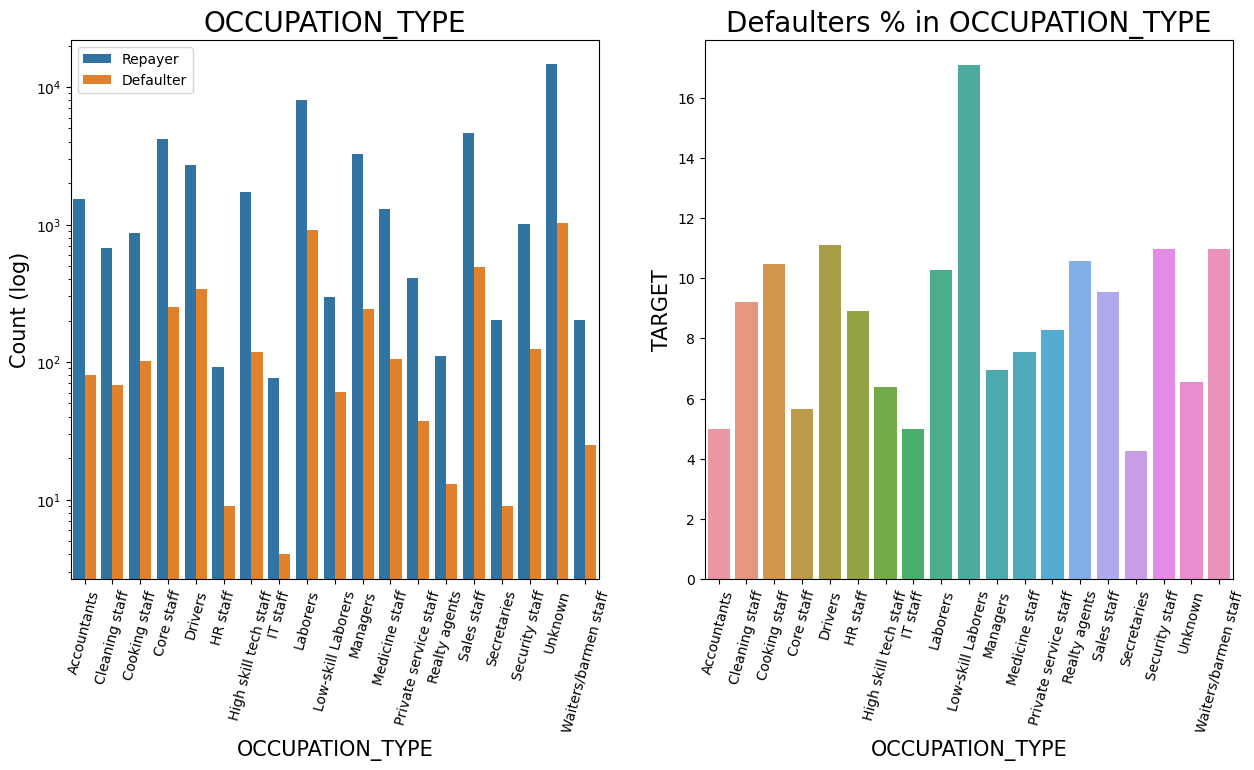

In [111]:
univariate(data1,"OCCUPATION_TYPE","TARGET",True,True)

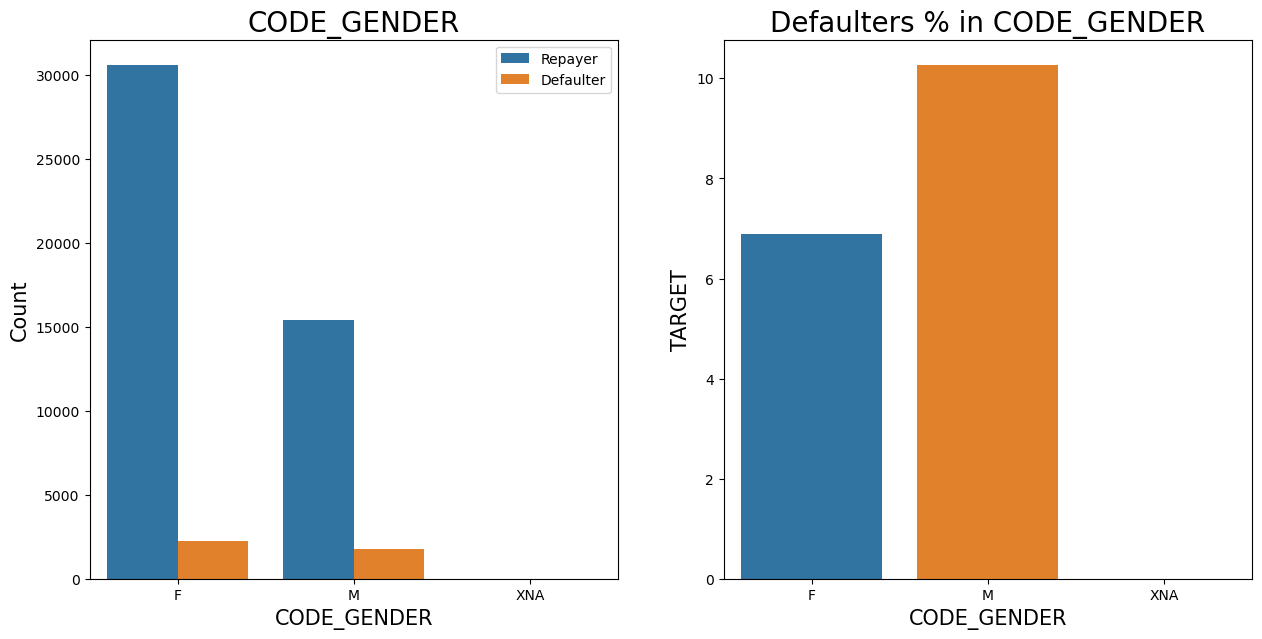

In [112]:
univariate(data1,"CODE_GENDER","TARGET",False,False,True)

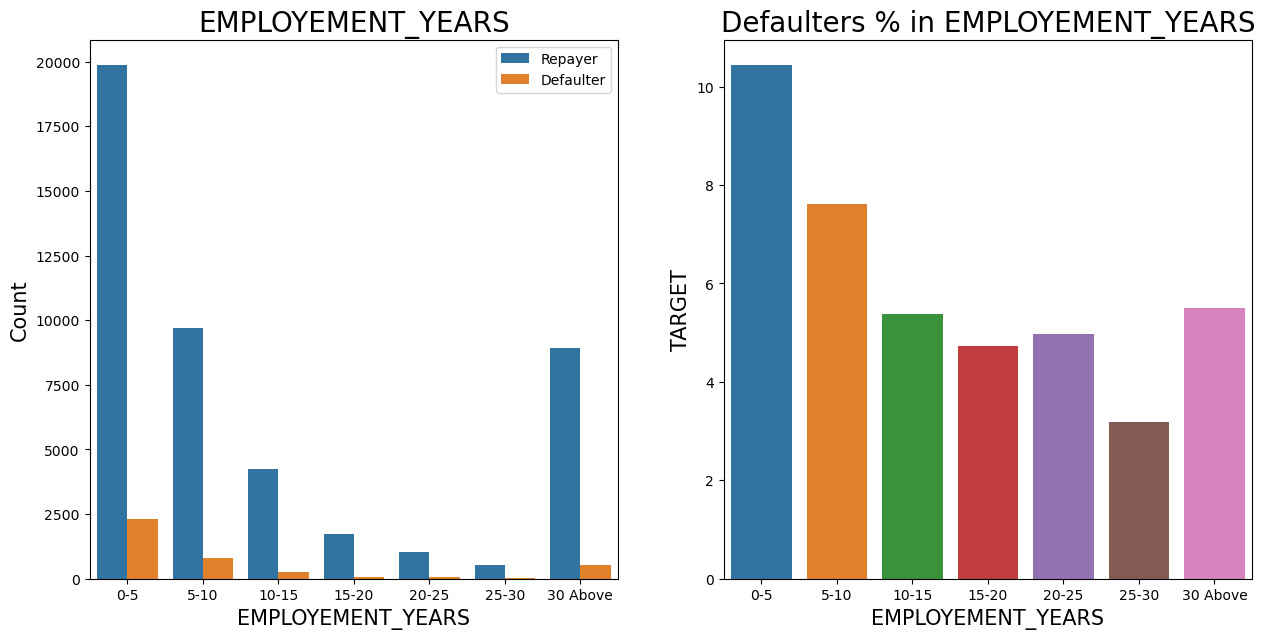

In [113]:
univariate(data1,"EMPLOYEMENT_YEARS","TARGET",False,False,True)

In [114]:
target_1_percentage = data1[["EMPLOYEMENT_YEARS","TARGET"]].groupby(["EMPLOYEMENT_YEARS"],as_index=False).mean()

In [115]:
target_1_percentage

,EMPLOYEMENT_YEARS,TARGET
0,0-5,0.104304
1,5-10,0.076074
2,10-15,0.053711
3,15-20,0.047248
4,20-25,0.049770
5,25-30,0.031835
6,30 Above,0.054966


In [116]:
target_1_percentage["TARGET"] = target_1_percentage["TARGET"]*100

In [117]:
target_1_percentage

,EMPLOYEMENT_YEARS,TARGET
0,0-5,10.430389
1,5-10,7.607350
2,10-15,5.371072
3,15-20,4.724847
4,20-25,4.976959
5,25-30,3.183521
6,30 Above,5.496604


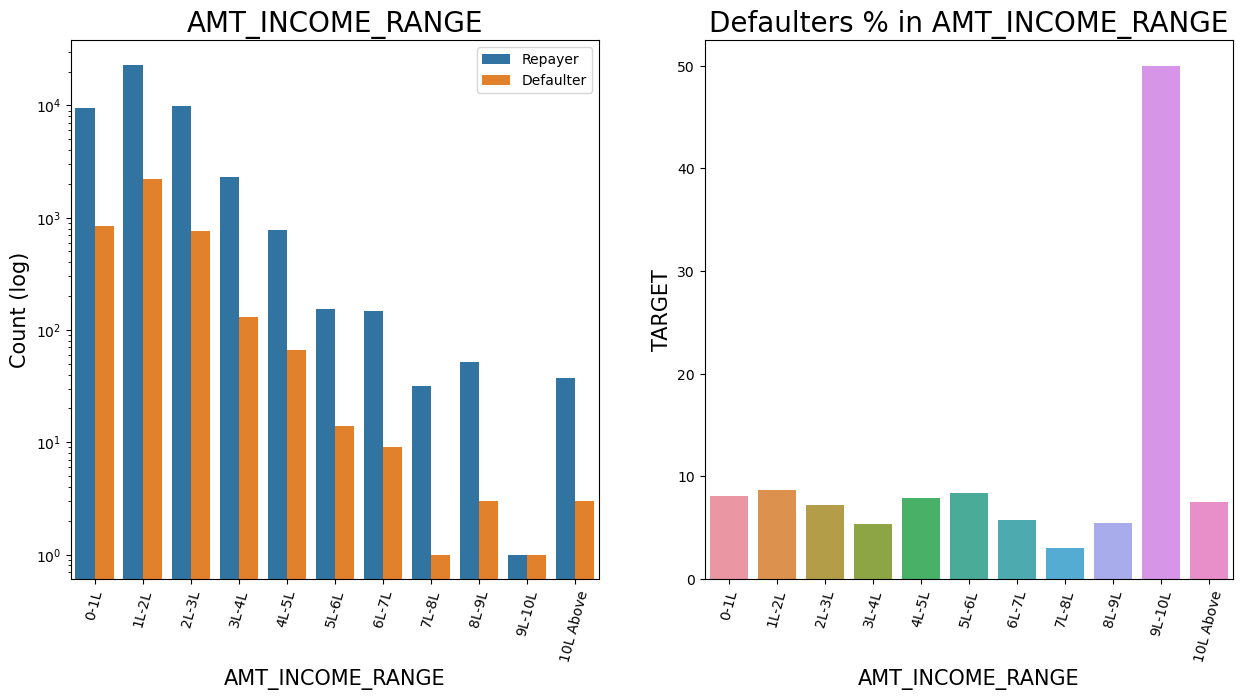

In [118]:
univariate(data1,"AMT_INCOME_RANGE","TARGET",True,True,True)

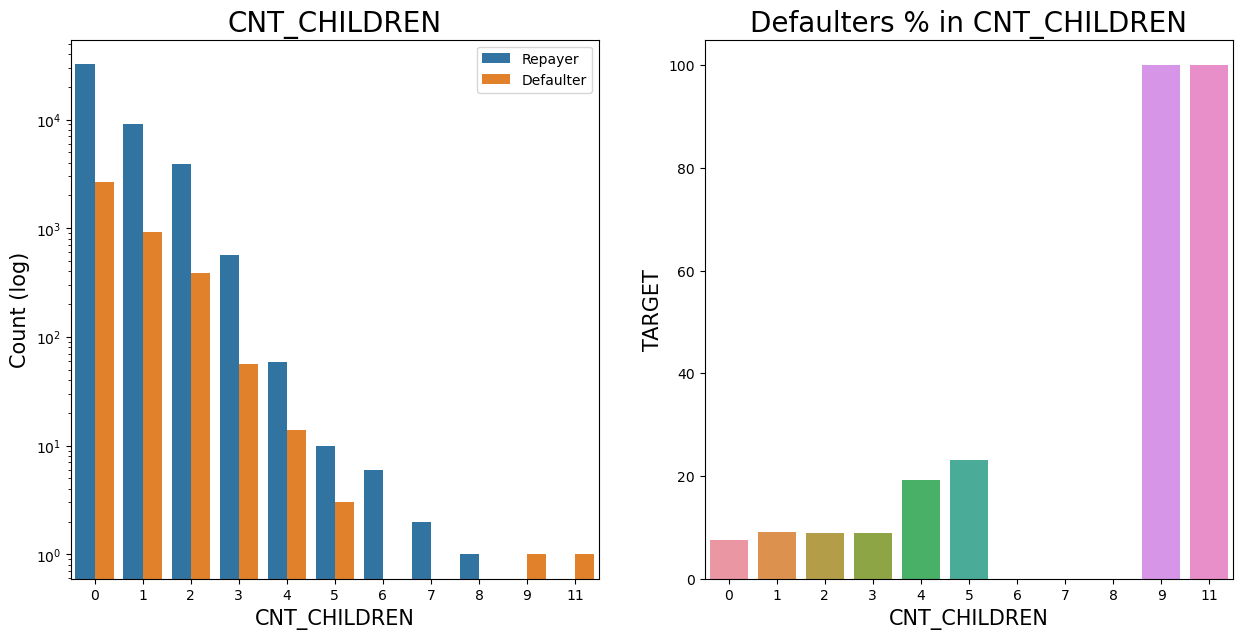

In [119]:
univariate(data1,"CNT_CHILDREN","TARGET",True,False,True)

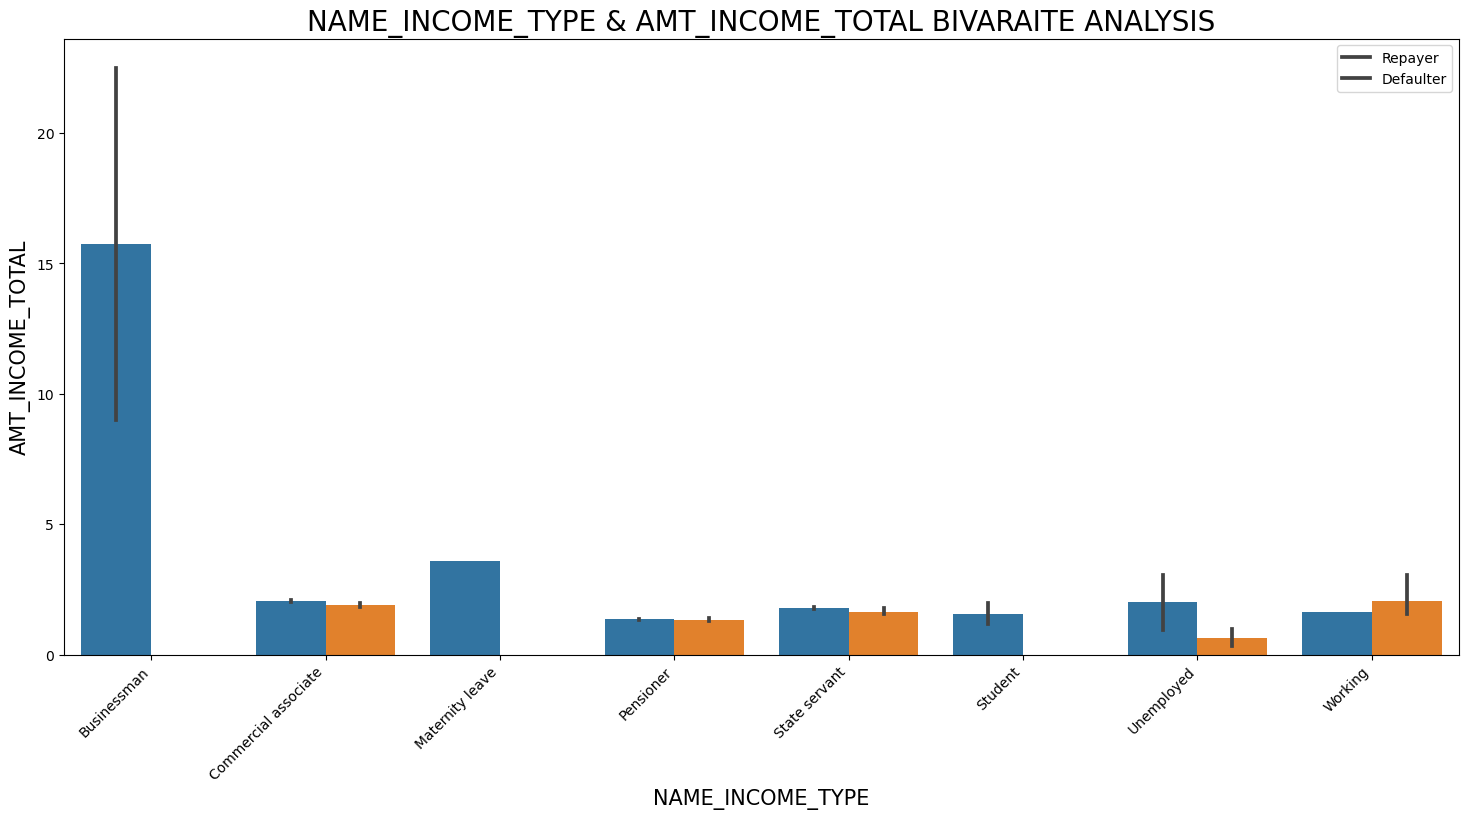

In [120]:
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",data1,"TARGET",(18,8),['Repayer','Defaulter'])

<Figure size 1500x1500 with 0 Axes>

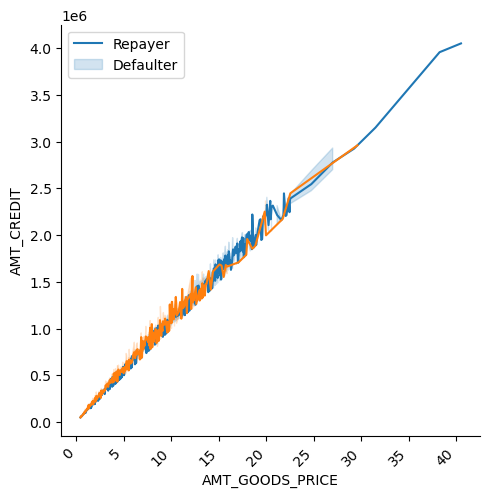

In [121]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',data1,"TARGET", "line",['Repayer','Defaulter'])

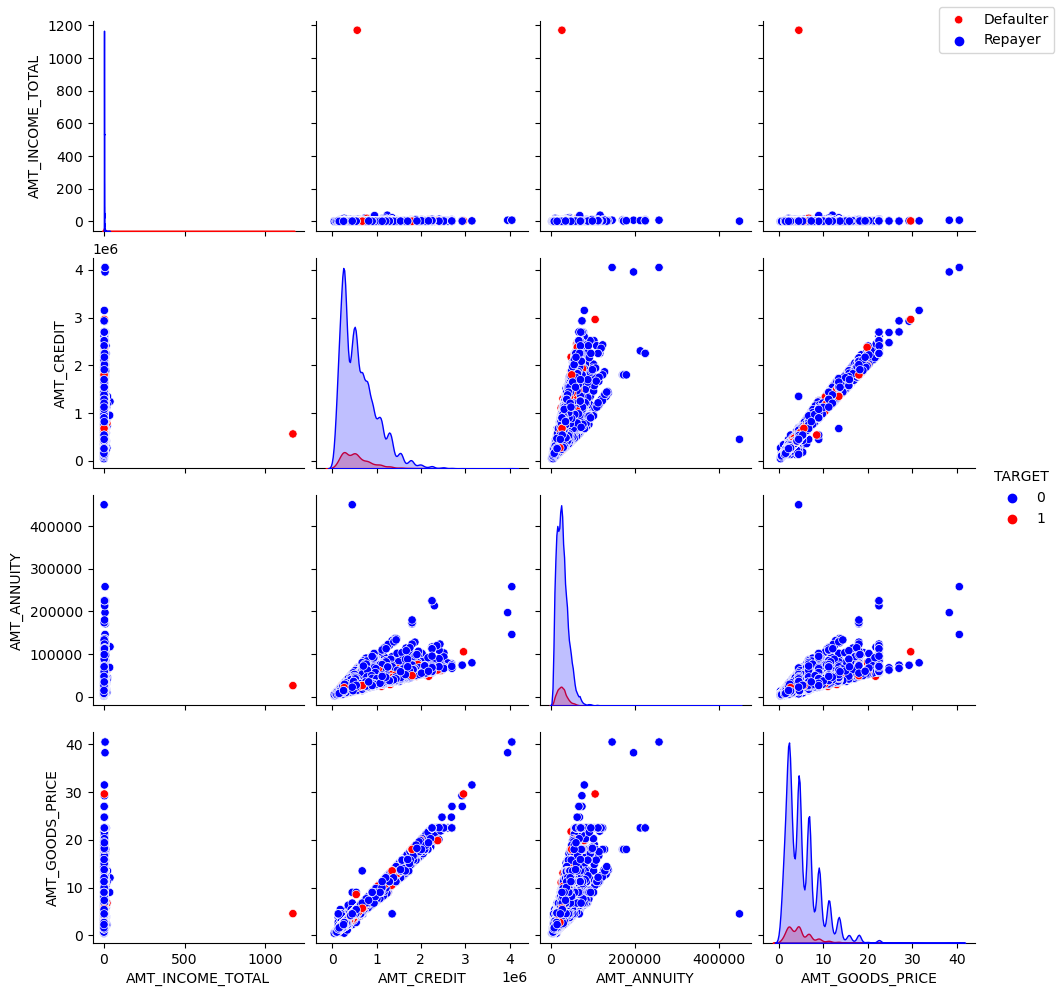

In [122]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = data1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
#amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

In [123]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


In [124]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(data1, data2, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100007,0,Cash loans,M,N,Y,0,1.2150,513000.0,21865.5,5.13,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,...,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Regional / Local,1200,Consumer electronics,18.0,high,Cash Street: high,365243.0,834.0,324.0,354.0,347.0,0.0,3
1,100009,0,Cash loans,F,Y,Y,1,1.7100,1560726.0,41301.0,13.95,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213,...,Cash through the bank,XAP,Unknown,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164,Consumer electronics,12.0,low_action,POS household without interest,365243.0,418.0,88.0,88.0,84.0,0.0,2
2,100012,0,Revolving loans,M,N,Y,0,1.3500,405000.0,20250.0,4.05,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437,...,XNA,XAP,Family,New,Audio/Video,POS,XNA,Country-wide,42,Connectivity,12.0,high,POS mobile with interest,365243.0,1641.0,1311.0,1401.0,1397.0,0.0,5
3,100026,0,Cash loans,F,N,N,1,4.5000,497520.0,32521.5,4.50,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,11146,4306,114,...,Cash through the bank,XAP,"Spouse, partner",New,Computers,POS,XNA,Country-wide,200,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,1396.0,1246.0,1246.0,1243.0,0.0,4
4,100027,0,Cash loans,F,N,Y,0,0.8325,239850.0,23850.0,2.25,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012,...,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,365243.0,365243.0,365243.0,365243.0,0.0,1


In [125]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

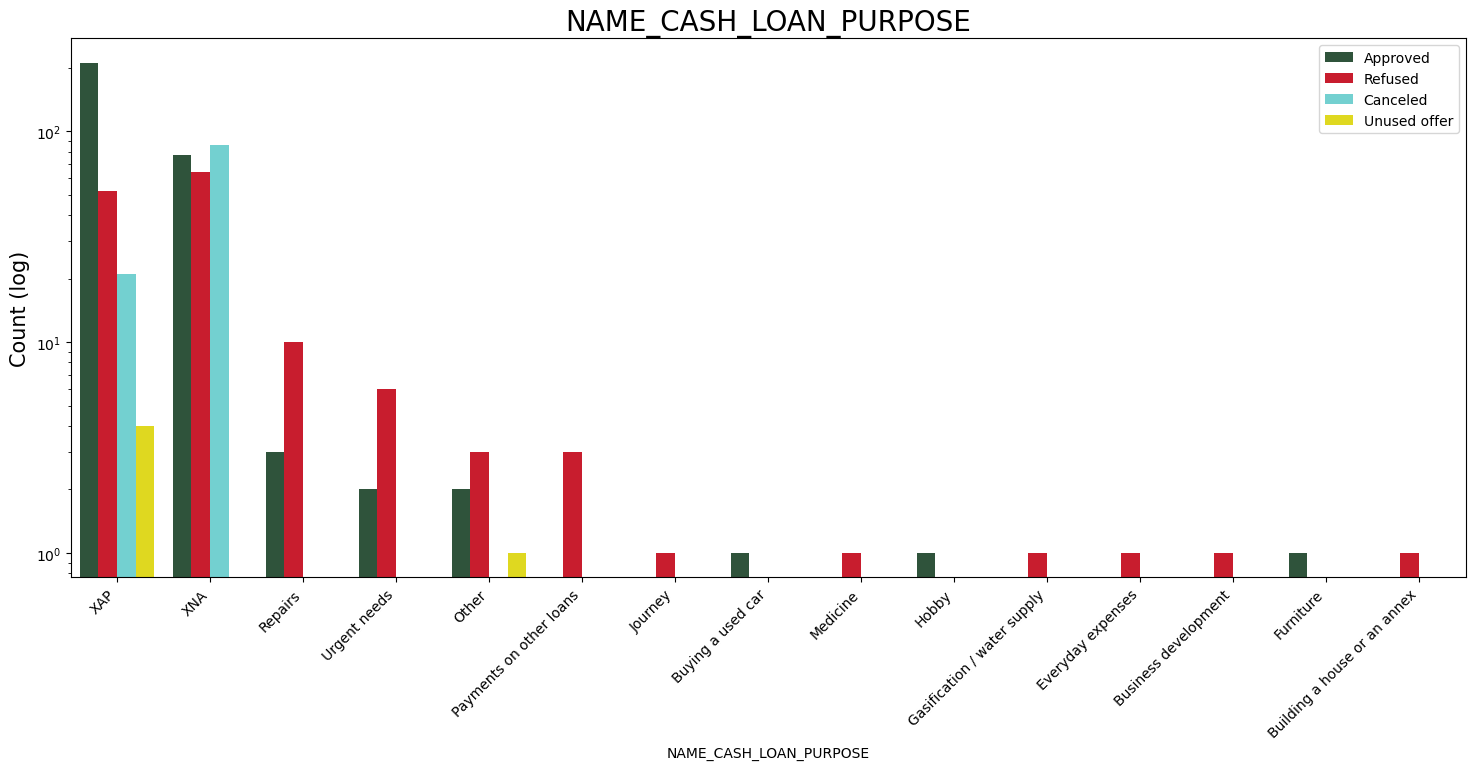

In [126]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

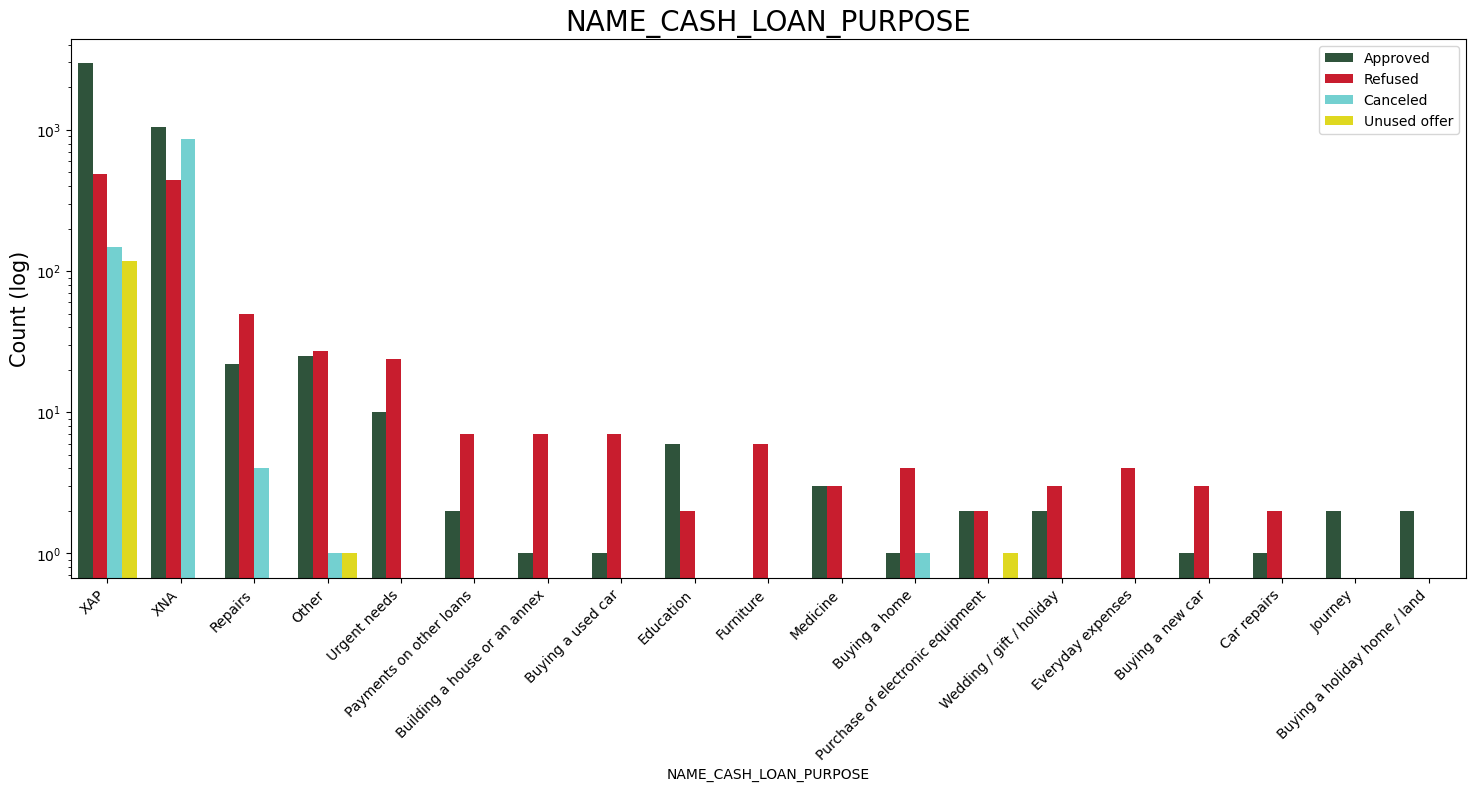

In [136]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

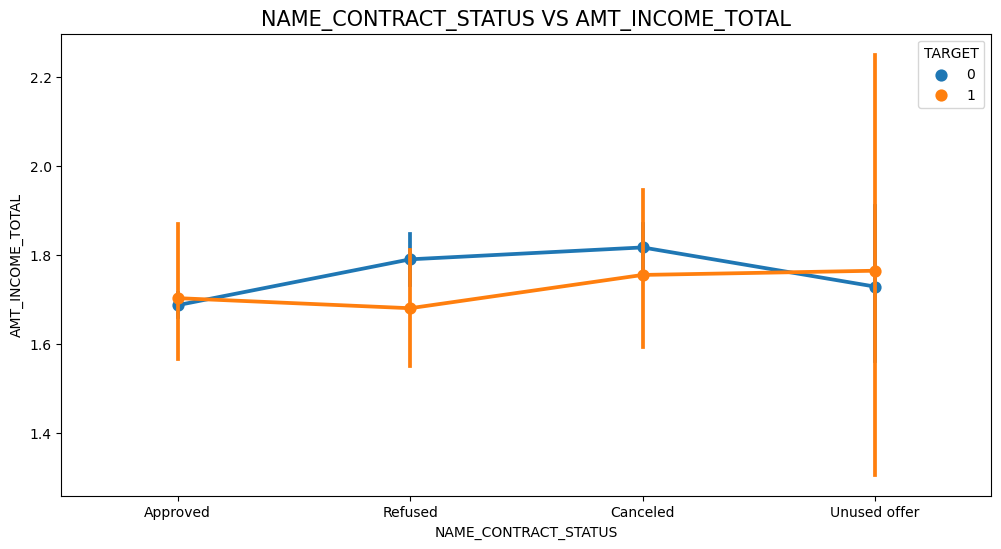

In [128]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

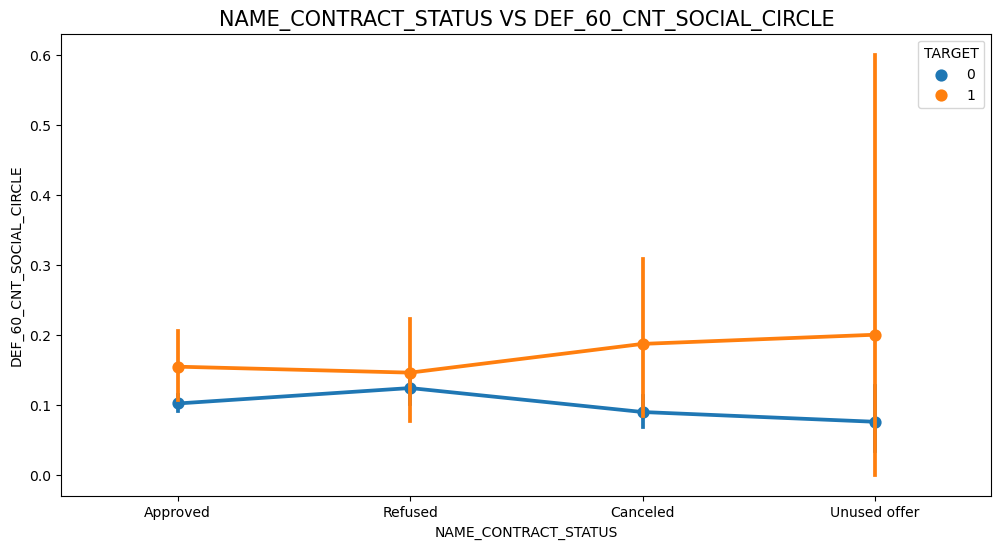

In [129]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

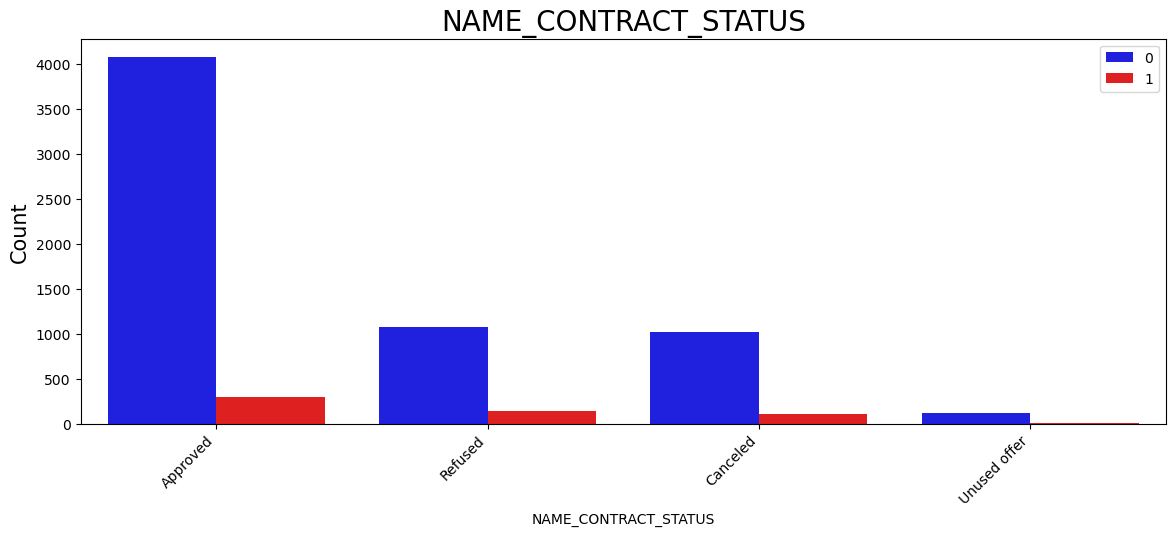

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0         4078     93.19%
                     1          298      6.81%
Canceled             0         1016     90.47%
                     1          107      9.53%
Refused              0         1074     88.18%
                     1          144     11.82%
Unused offer         0          119     95.97%
                     1            5      4.03%

In [137]:

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['b','r'],False,(14,5))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

In [130]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = data1.loc[data1['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df =data1.loc[data1['TARGET']==1, cols_for_correlation]

In [131]:
#top correlations for repayers

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/651973205.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = Repayer_df.corr()


,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987000
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.768833
43,AMT_ANNUITY,AMT_CREDIT,0.763737
131,DAYS_EMPLOYED,DAYS_BIRTH,0.623475
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.447222
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.384576
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.377966
152,DAYS_REGISTRATION,DAYS_BIRTH,0.335028
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.274516
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.270073


In [132]:
#top correlations for defaulters

corr_repayer = Defaulter_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/3417644932.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = Defaulter_df.corr()


,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.982268
43,AMT_ANNUITY,AMT_CREDIT,0.749665
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.749504
131,DAYS_EMPLOYED,DAYS_BIRTH,0.588243
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.351200
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.301421
152,DAYS_REGISTRATION,DAYS_BIRTH,0.288438
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.277264
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.247897
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.232662


/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/1694758315.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


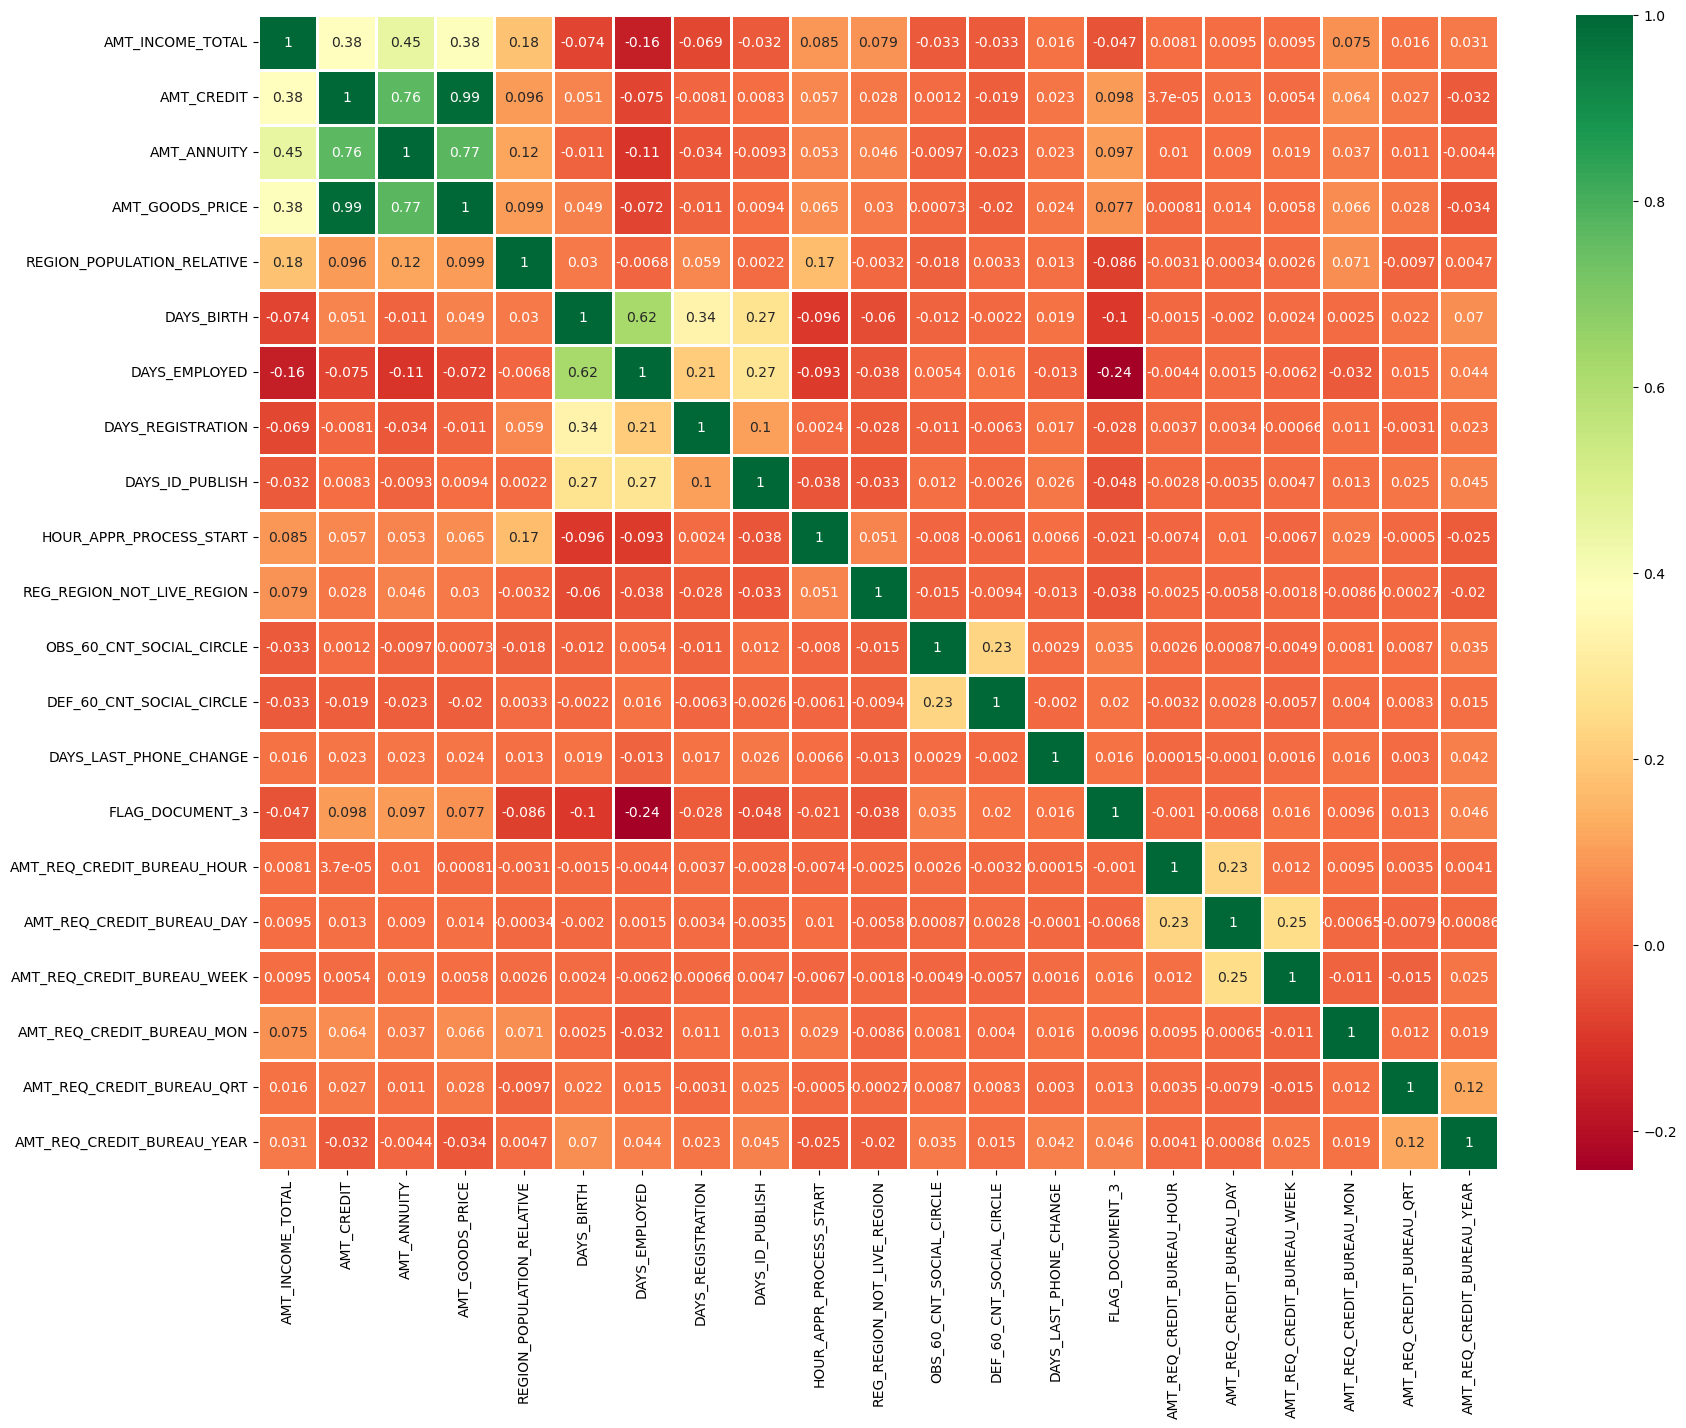

In [133]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

/var/folders/03/vhcz9d256mj07p3_2_0w00k40000gn/T/ipykernel_7239/2136711160.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


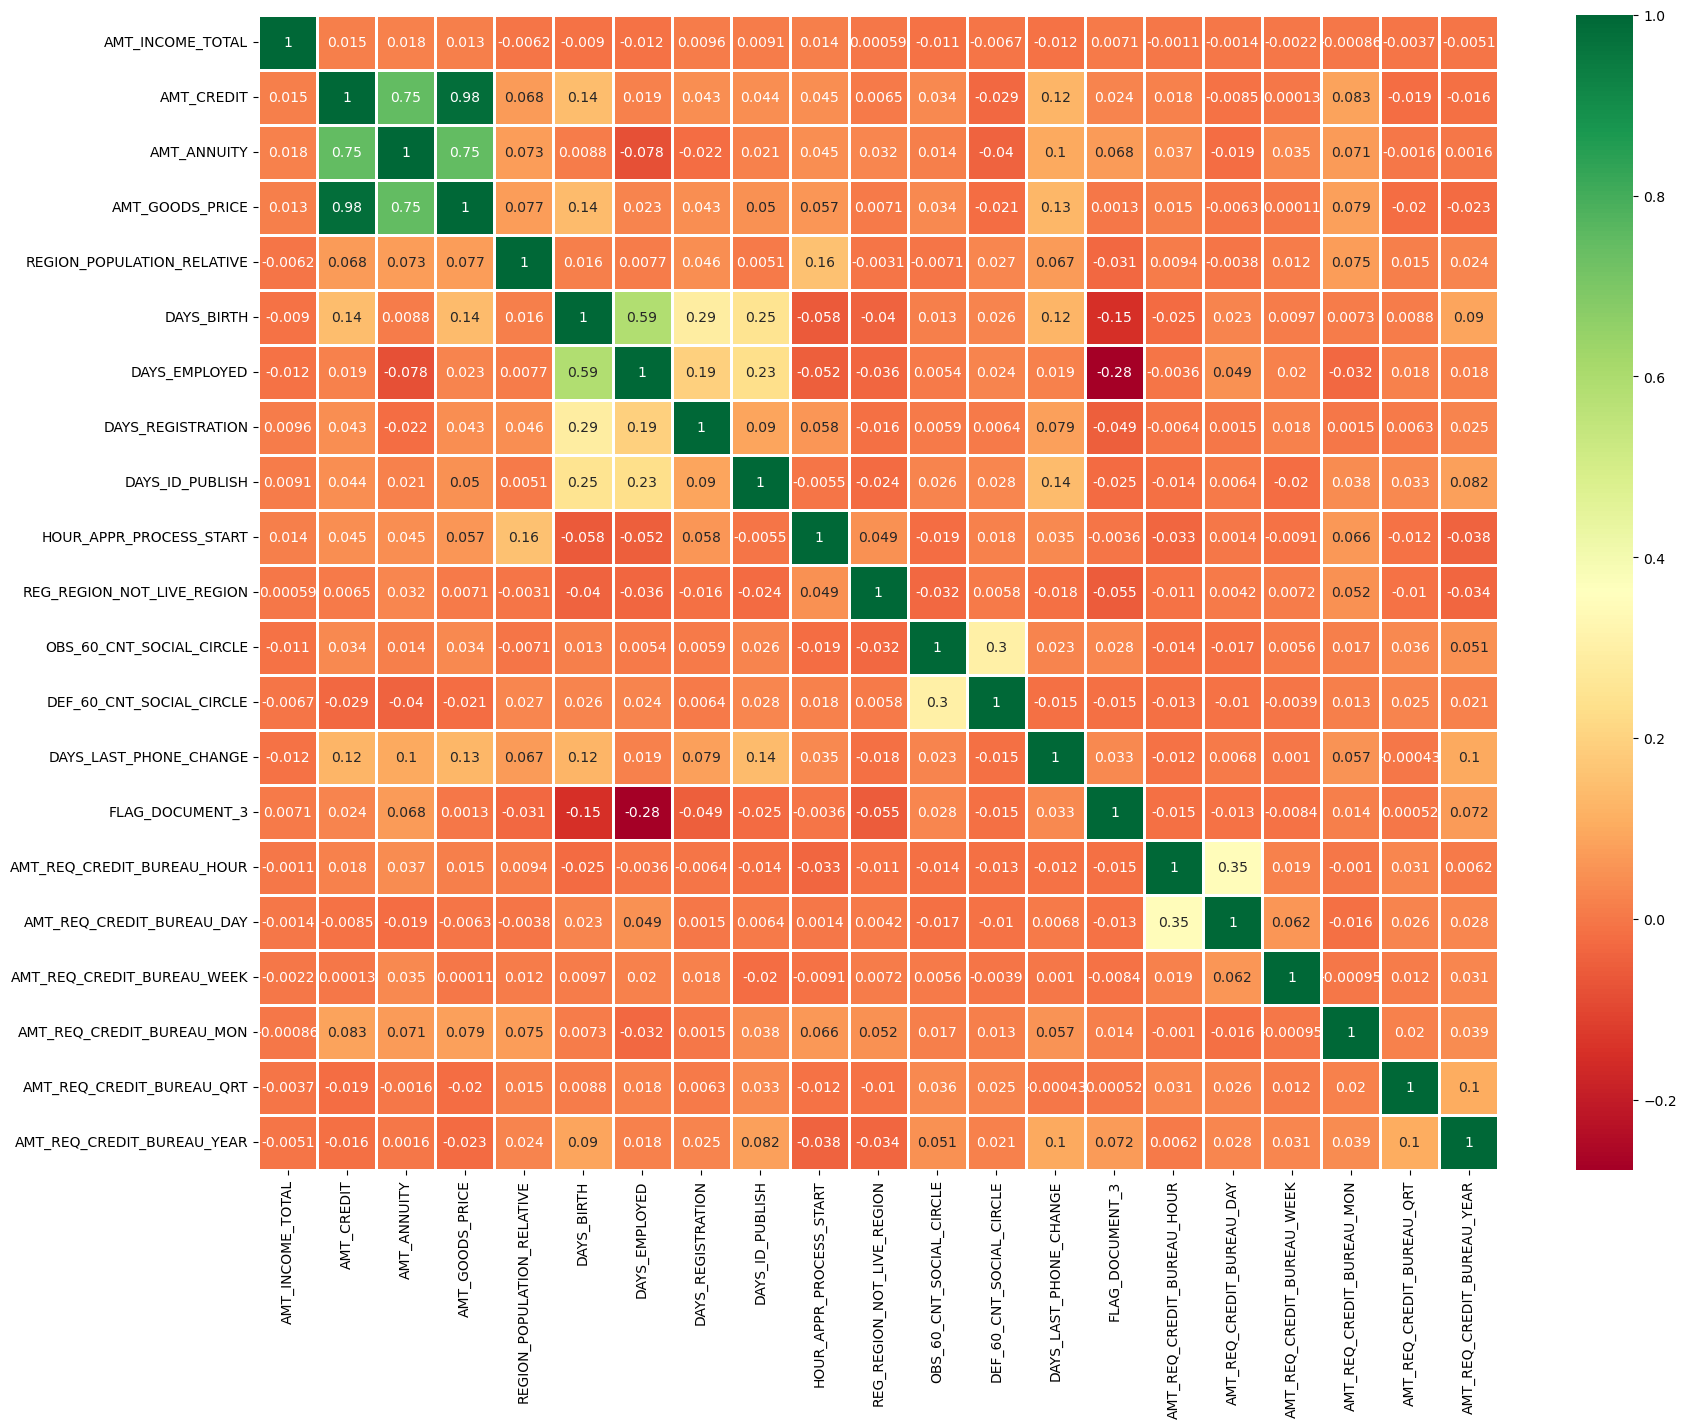

In [134]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)